# Производство Severstal

## Задание:
- **Необходимо разработать алгоритм анализа информации о заказах материалов с целью определения того, будет ли заказ выполнен вовремя (бинарная классификация). Для этого в вашем распоряжении есть выборка из размеченных заказов и метаданные по каждому из них, где содержится информация о материалах, поставщике и согласовании заказа. По этим данным необходимо научиться определять наличие или отсутствие признаков срыва заказа.**
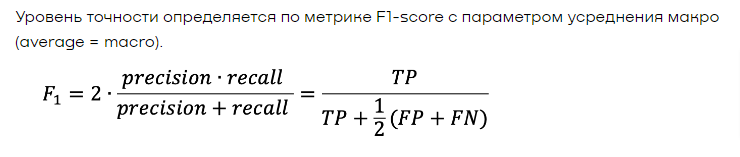

### Признаки:
- **Сумма** - `Сумма заказа на поставку`
- **Материал** - `ID материала`
- **Поставщик** - `ID Поставщик`
- **Категорийный менеджер** - `ID категор.менеджера`
- **Операционный менеджер** - `ID опер.менеджера`
- **Завод** - `ID завода`
- **Закупочная организация** - `ID закупочной организации`
- **Балансовая единица** - `ID балансовой единицы`
- **Группа закупок** - `ID группы закупок`
- **Группа материалов** - `ID материалов`
- **Вариант поставки** - `ID варианта поставки`
- **НРП** - `Количество раз, когда заказ помечался как срочный. В редких случаях может быть более 1 раза`
- **Длительность** - `Разница в днях между созданием заказа и  планируемым стартом поставок`
- **Месяц 1** - `Месяц создания заказа на закупку`
- **Месяц 2** - `Месяц старта поставок`
- **День недели 2** - `Значение дня недели старта поставок`
- **Изменение даты поставки 30/15/7**- `Сколько раз менялась дата поставки с момента создания заказа в течение 30/15/7 дней`
- **Количество** - `Количества товара`
- **Согласование заказа 1** - `Частота нахождения заказа на первой стадии`
- **Согласование заказа 2** - `Частота нахождения заказа на второй стадии`
- **Согласование заказа 3** - `Частота нахождения заказа на третьей стадии`
- **Изменение позиции заказа на закупку: дата поставки** - `Частота события «Изменение позиции заказа на закупку: дата поставки»`
- **Отмена полного деблокирования заказа на закупку** - `Частота события «Отмена полного деблокирования заказа на закупку»`
- **Изменение позиции заказа на закупку: изменение даты поставки на бумаге** - `Частота события «Изменение позиции заказа на закупку: изменение даты поставки на бумаге». Изменяется поставщиком на бумажных документах`
- **Дней между 0-1** - `Количество дней между первыми событиями «Создание заявки на закупку» и «Создание позиции заказа на закупку»`
- **Дней между 1-2** - `Количество дней между первыми событиями «Создание позиции заказа на закупку» и «Согласование заказа 1»`
- **Дней между 2-3** - `Количество дней между первыми событиями «Согласование заказа 1» и «Согласование заказа 2»`
- **Дней между 3-4** - `Количество дней между первыми событиями «Согласование заказа 2» и «Согласование заказа 3»`
- **Дней между 4-5** - `Количество дней между первыми событиями «Согласование заказа 3» и «Полное деблокирование заказа на закупку»`
- **Дней между 5-6** - `Количество дней между первыми событиями «Полное деблокирование заказа на закупку» и «Изменение заявки на закупку: изменение плановой даты поставки»`
- **Дней между 6-7** - `Количество дней между первыми событиями «Изменение заявки на закупку: изменение плановой даты поставки» и «Изменение позиции заказа на закупку: изменение даты поставки на бумаге»`
- **Дней между 7-8** - `Количество дней между первыми событиями «Изменение позиции заказа на закупку: изменение даты поставки на бумаге» и «Изменение заявки на закупку: присвоение источника поставки»`
- **Количество обработчиков 7** - `Количество уникальных пользователей, работавших с позицией заказа в течение 7 дней с момента заведения заказа`
- **Количество обработчиков 15** - `Количество уникальных пользователей, работавших с позицией заказа в течение 15 дней с момента заведения заказа`
- **Количество обработчиков 30** - `Количество уникальных пользователей, работавших с позицией заказа в течение 30 дней с момента заведения заказа`
- **ЕИ**  - `ID единицы измерения`
- **До поставки** - `Минимум между фактическим поступлением и запланируемым поступлением(длительность). Если столбец не равен значению из столбца "Длительность", то поставка произошла раньше планируемой`
- **Количество циклов согласования** - `Сколько раз заказ проходил через стадии согласования`
- **Количество изменений после согласований** - `Количество изменений в заказе после прохождения согласований`
- **Месяц 3** - `Месяц технической даты появления заказа в специальных учетных системах. Можно не рассматривать при анализе`
- **Количество позиций** - `Технический столбец. Рекомендуется не рассматривать при анализе`
- **y** - `Целевой признак`

In [1]:
#!pip install imbalanced-learn

In [2]:
#импортируем библиотеки
import os
import numpy as np
import pandas as pd

from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#gradient boosting
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

#imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import InstanceHardnessThreshold

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import ADASYN

In [3]:
%%time
#загружаем данные
PATH_TRAIN = os.path.abspath('') + '/train_AIC.csv'
PATH_TEST = os.path.abspath('') + '/test_AIC.csv'

train = pd.read_csv(PATH_TRAIN, engine='pyarrow')
test = pd.read_csv(PATH_TEST, engine='pyarrow')

#удаляем призак по условию задачи 
train.drop(['Количество позиций'], axis=1, inplace=True)
test.drop(['Количество позиций'], axis=1, inplace=True)

Wall time: 1.62 s


# Знакомство с данными

In [4]:
def get_info(data):
    print('Duplicates:', data.duplicated().sum())
    print('Table shape:', data.shape)
    print()
    print('Columns:')
    display(data.columns.to_list())
    print('Null values:')
    display(data.isna().sum())
    features = list(set(data.columns))
    for i in range(0, len(features), 6):        
        subset = features[i:i+6]
        dist = data[subset].hist(figsize=(20,15));
        plt.show()
    return plt.show()

Duplicates: 4752
Table shape: (225000, 43)

Columns:


['Поставщик',
 'Материал',
 'Категорийный менеджер',
 'Операционный менеджер',
 'Завод',
 'Закупочная организация',
 'Группа закупок',
 'Балансовая единица',
 'ЕИ',
 'Группа материалов',
 'Вариант поставки',
 'НРП',
 'Длительность',
 'До поставки',
 'Месяц1',
 'Месяц2',
 'Месяц3',
 'День недели 2',
 'Сумма',
 'Количество',
 'Количество обработчиков 7',
 'Количество обработчиков 15',
 'Количество обработчиков 30',
 'Согласование заказа 1',
 'Согласование заказа 2',
 'Согласование заказа 3',
 'Изменение даты поставки 7',
 'Изменение даты поставки 15',
 'Изменение даты поставки 30',
 'Отмена полного деблокирования заказа на закупку',
 'Изменение позиции заказа на закупку: изменение даты поставки на бумаге',
 'Изменение позиции заказа на закупку: дата поставки',
 'Количество циклов согласования',
 'Количество изменений после согласований',
 'Дней между 0_1',
 'Дней между 1_2',
 'Дней между 2_3',
 'Дней между 3_4',
 'Дней между 4_5',
 'Дней между 5_6',
 'Дней между 6_7',
 'Дней между 7_8',


Null values:


Поставщик                                                                 0
Материал                                                                  0
Категорийный менеджер                                                     0
Операционный менеджер                                                     0
Завод                                                                     0
Закупочная организация                                                    0
Группа закупок                                                            0
Балансовая единица                                                        0
ЕИ                                                                        0
Группа материалов                                                         0
Вариант поставки                                                          0
НРП                                                                       0
Длительность                                                              0
До поставки 

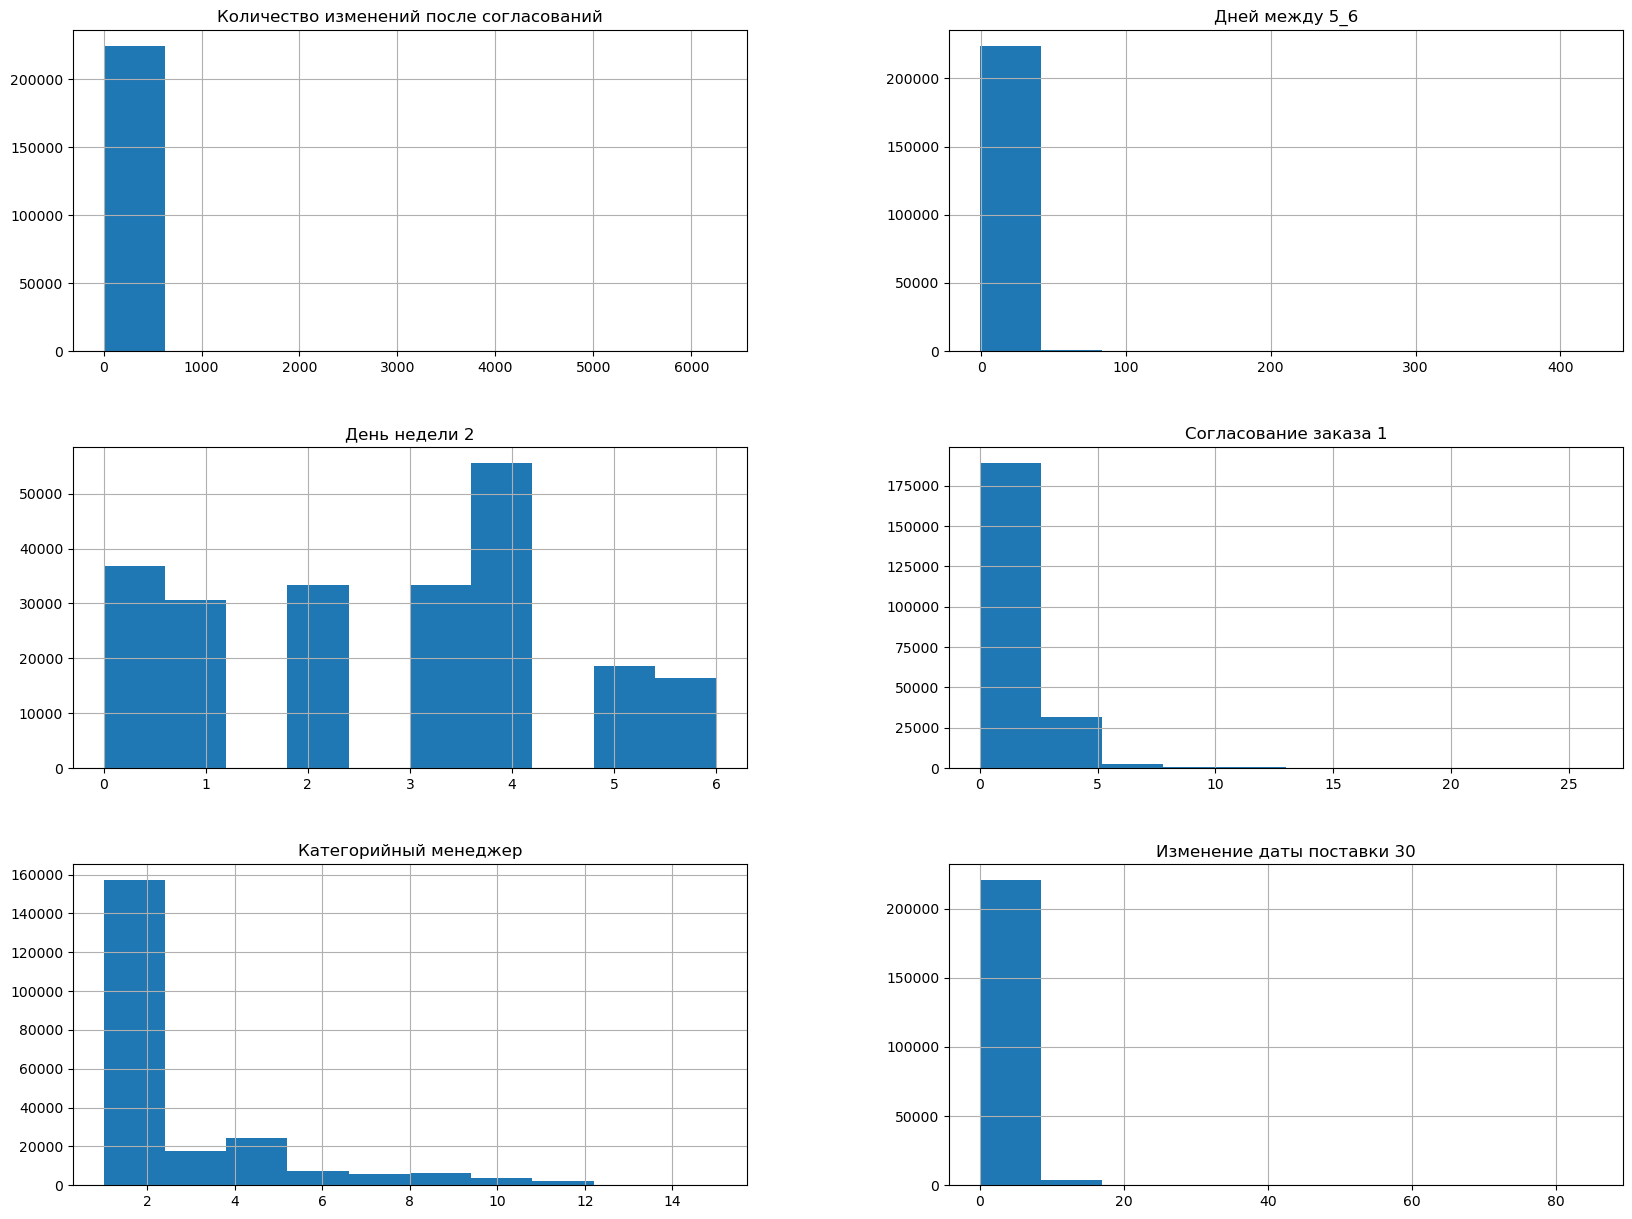

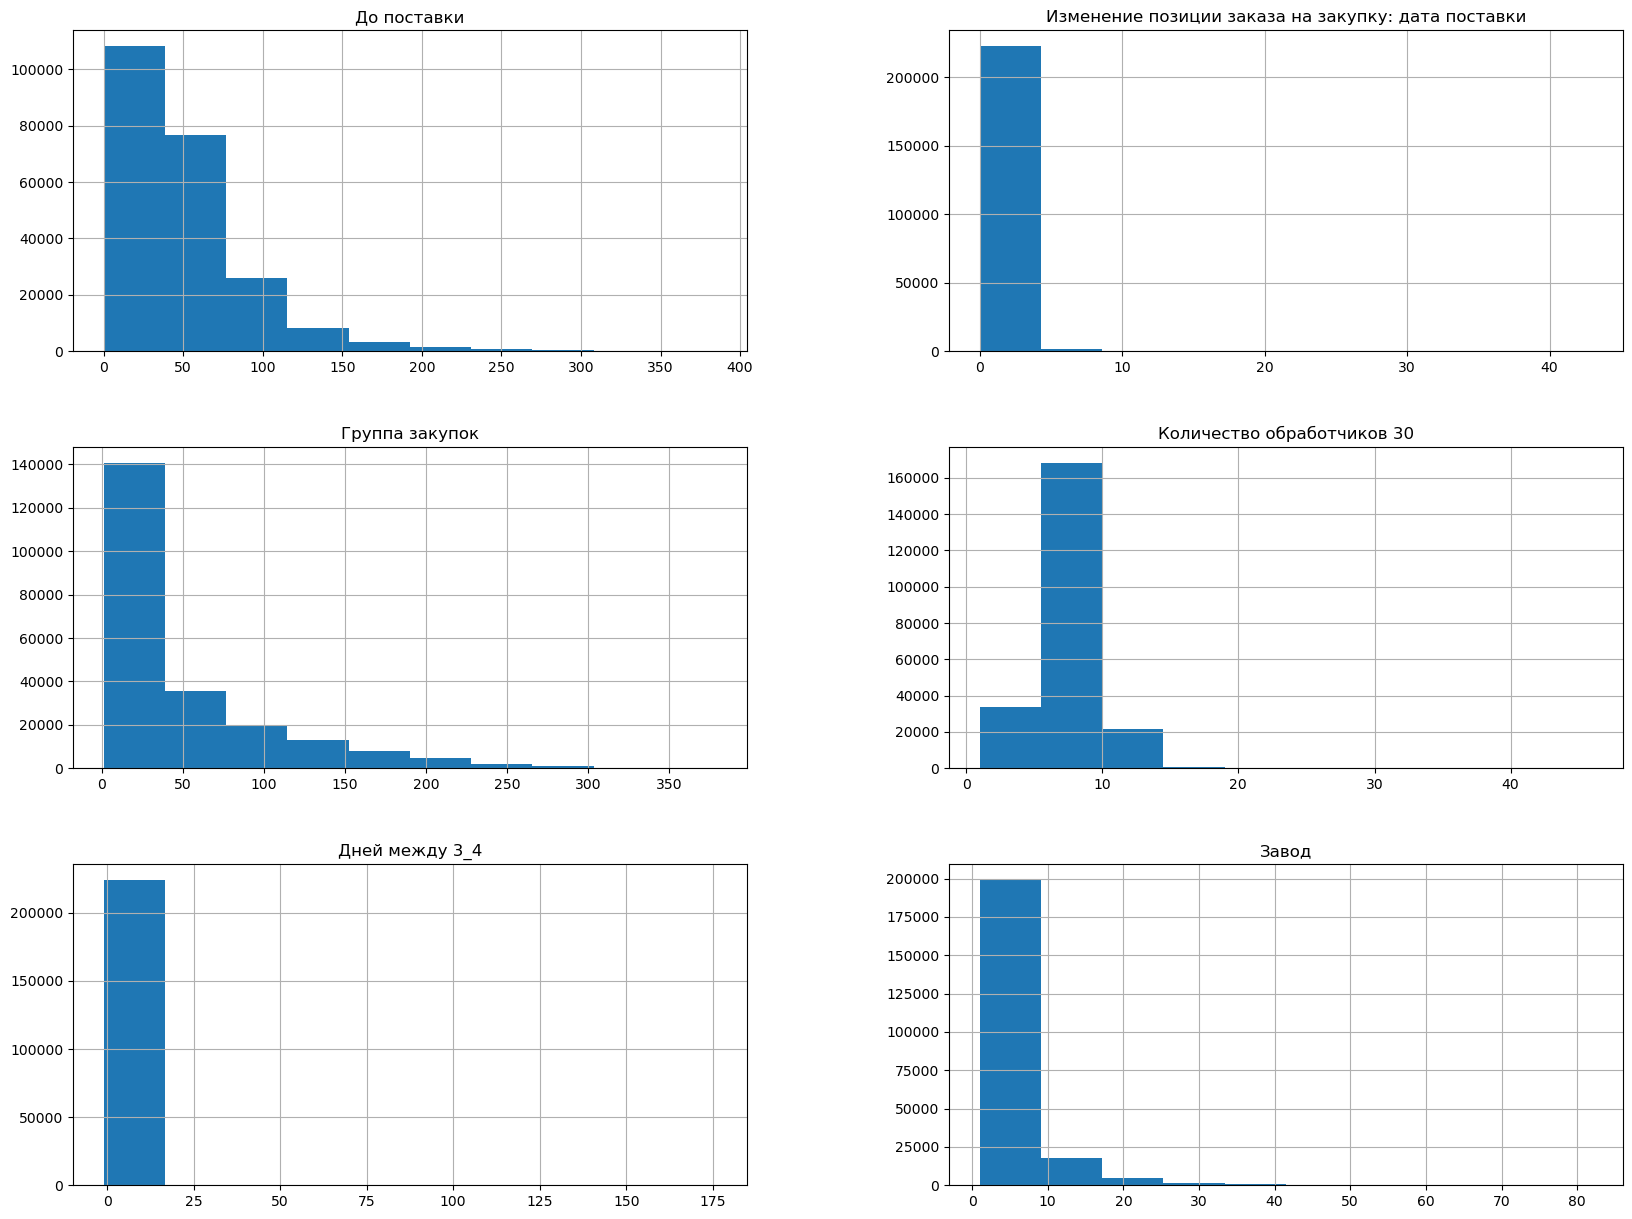

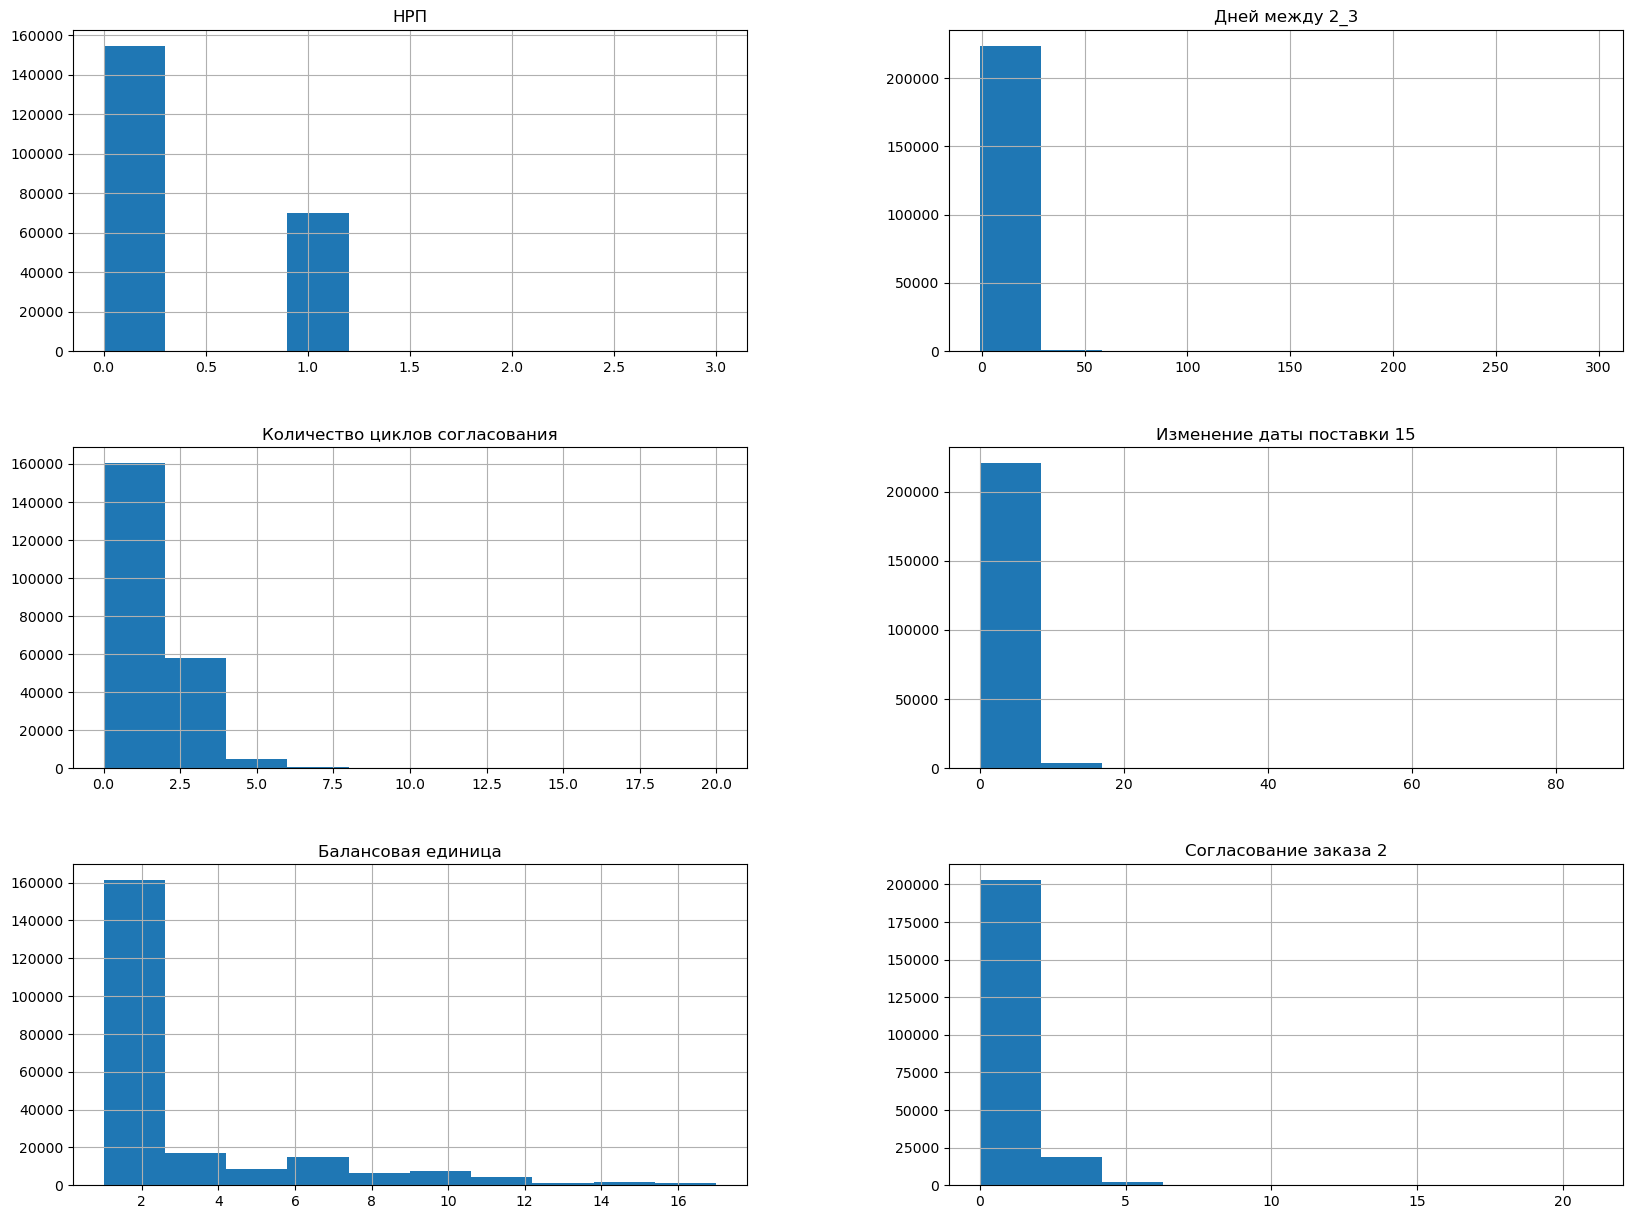

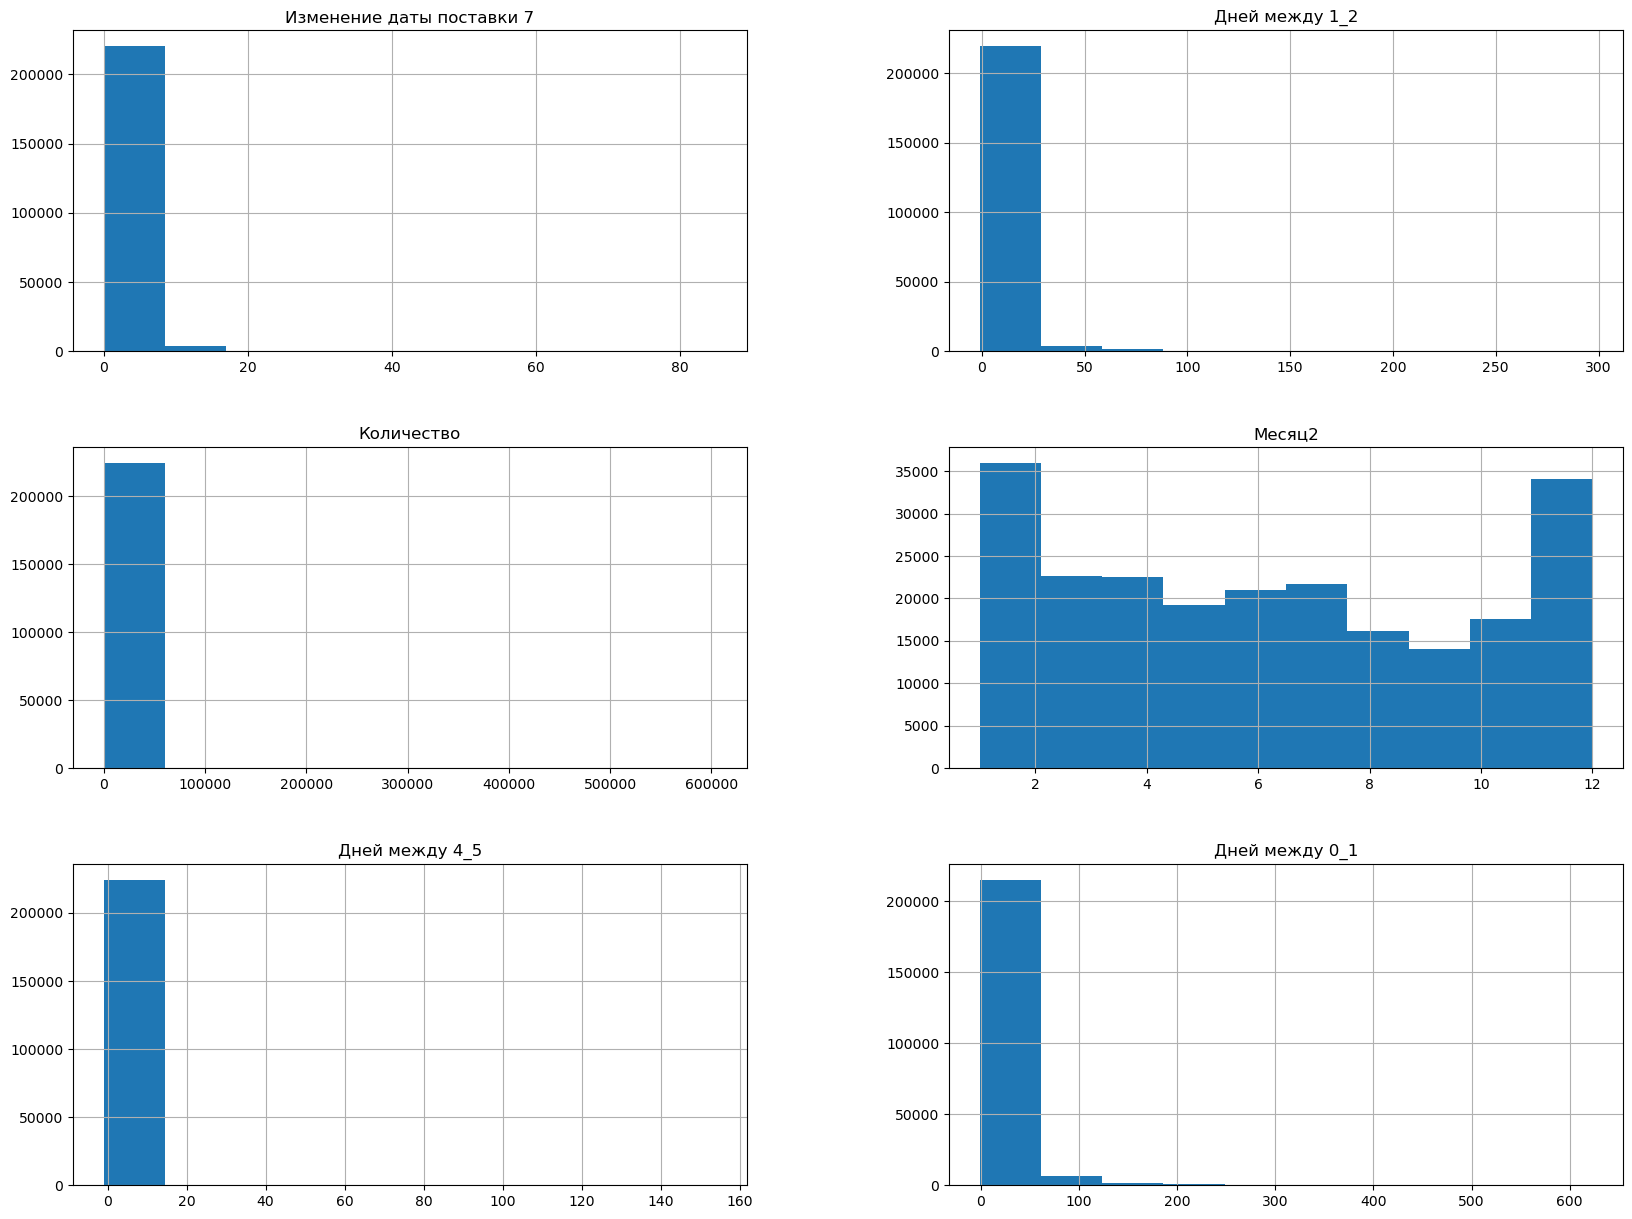

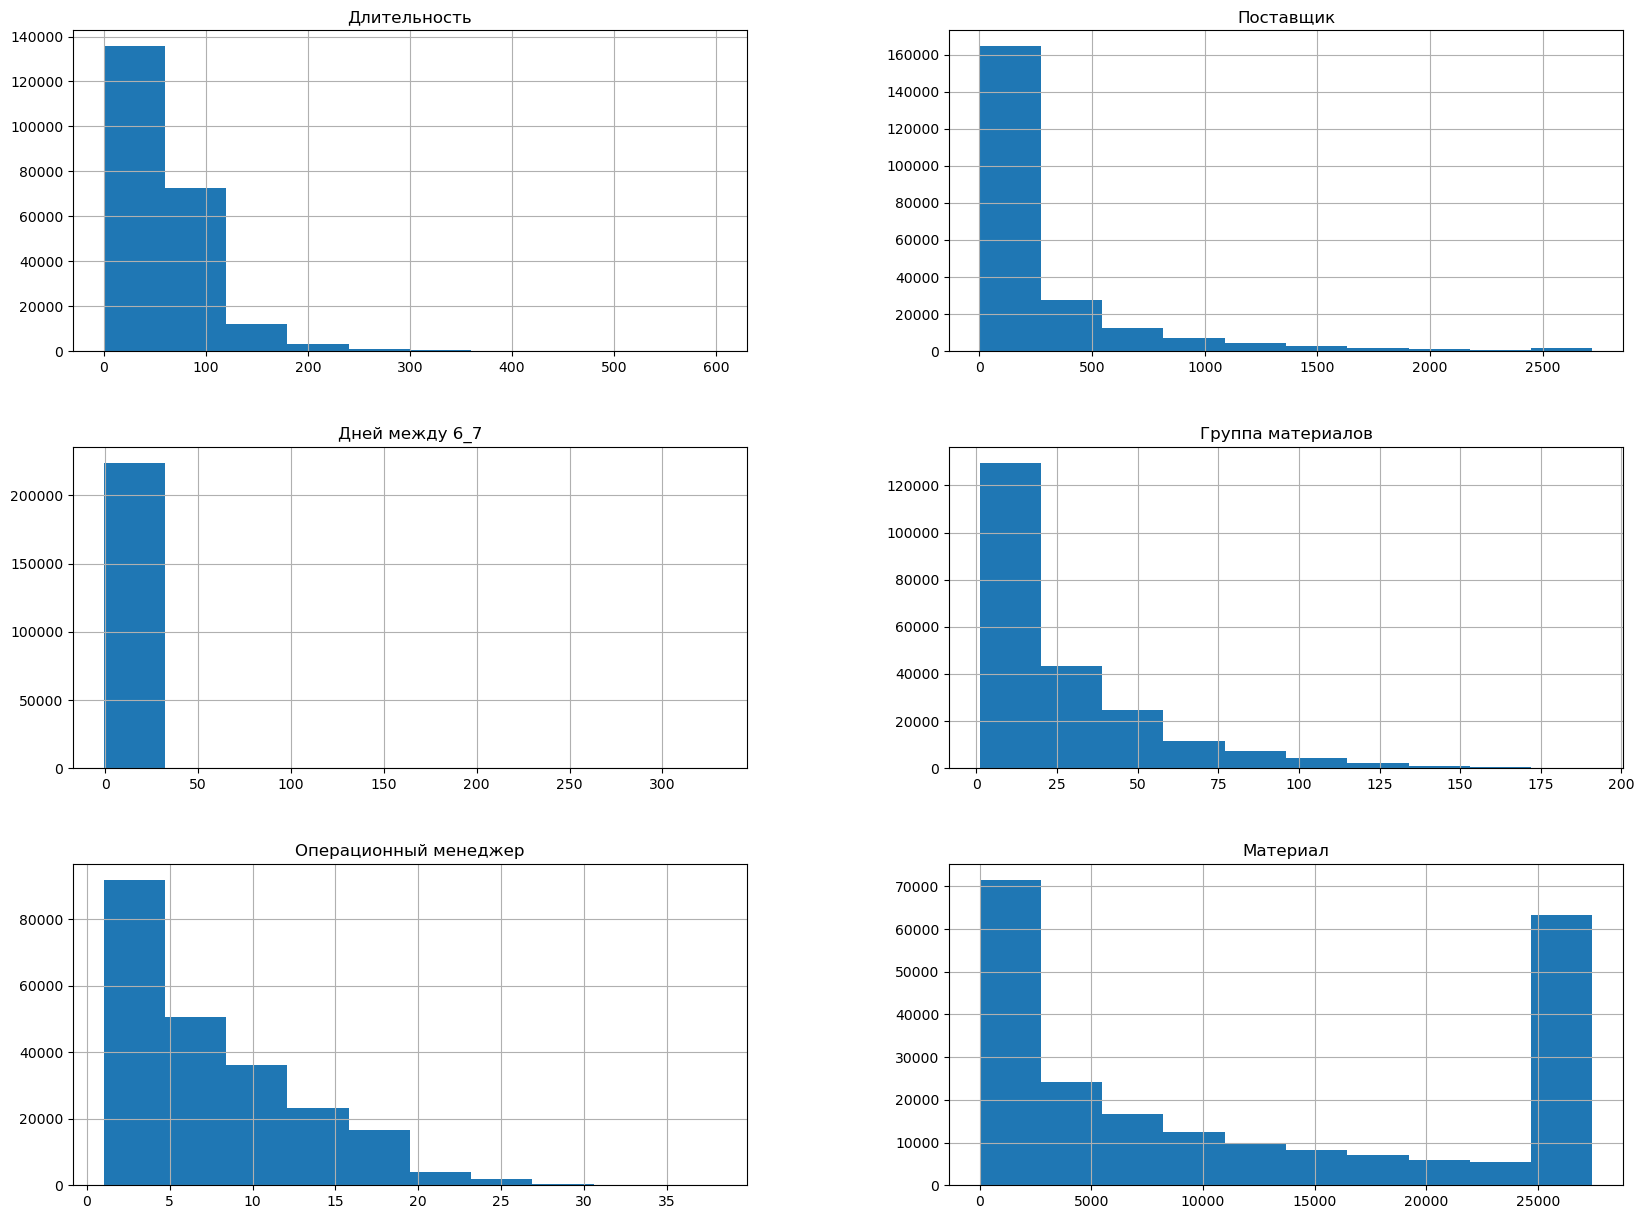

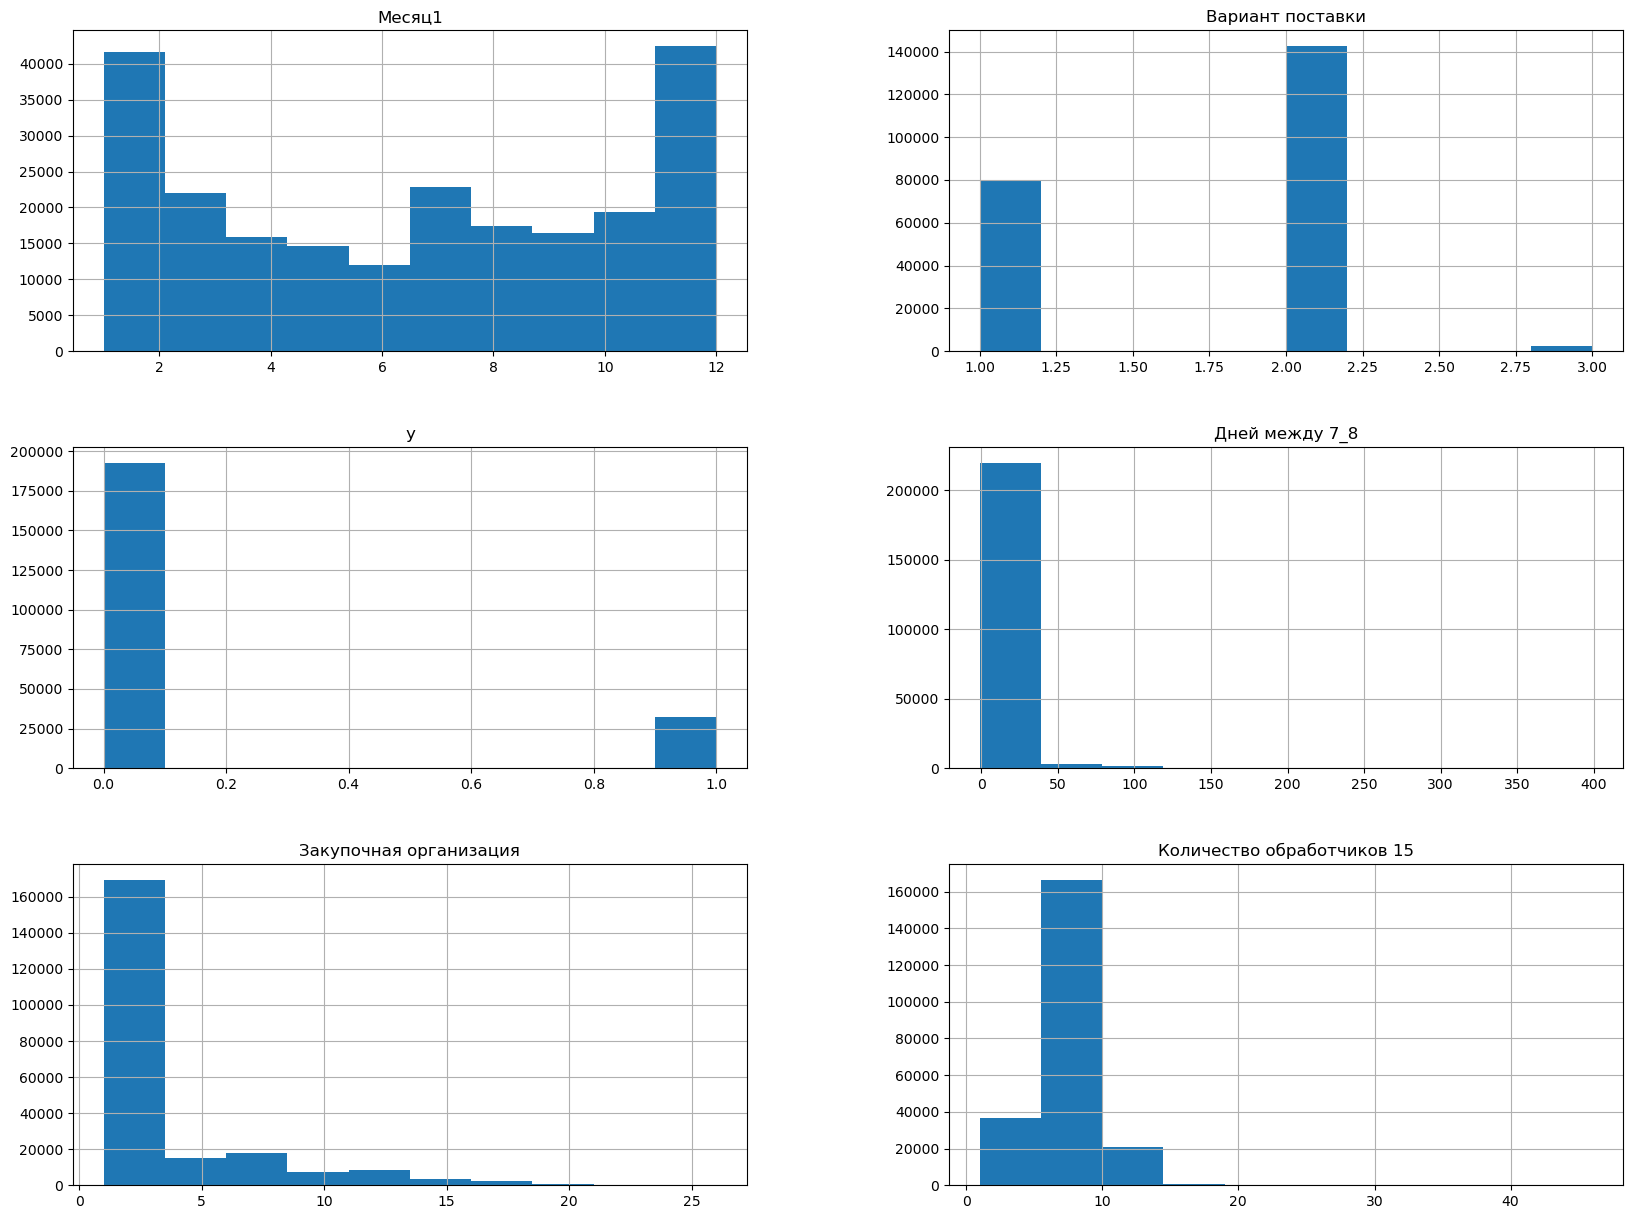

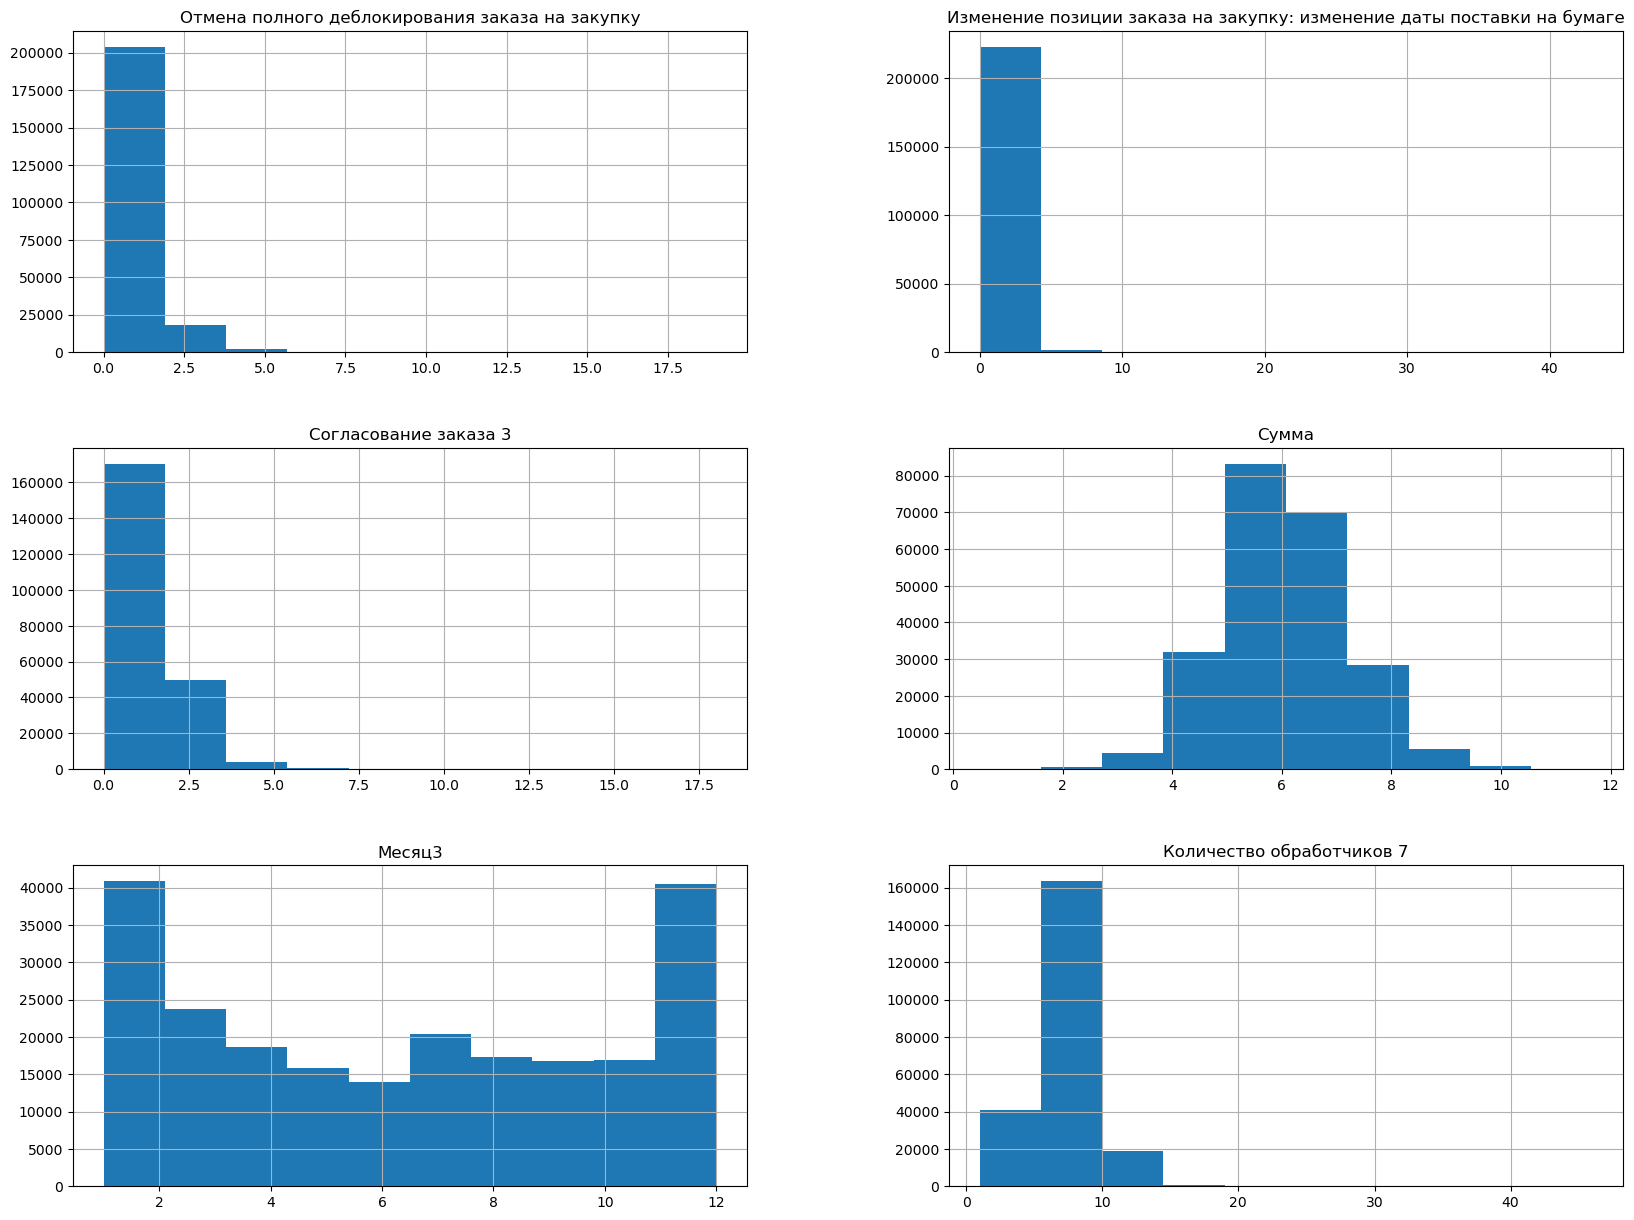

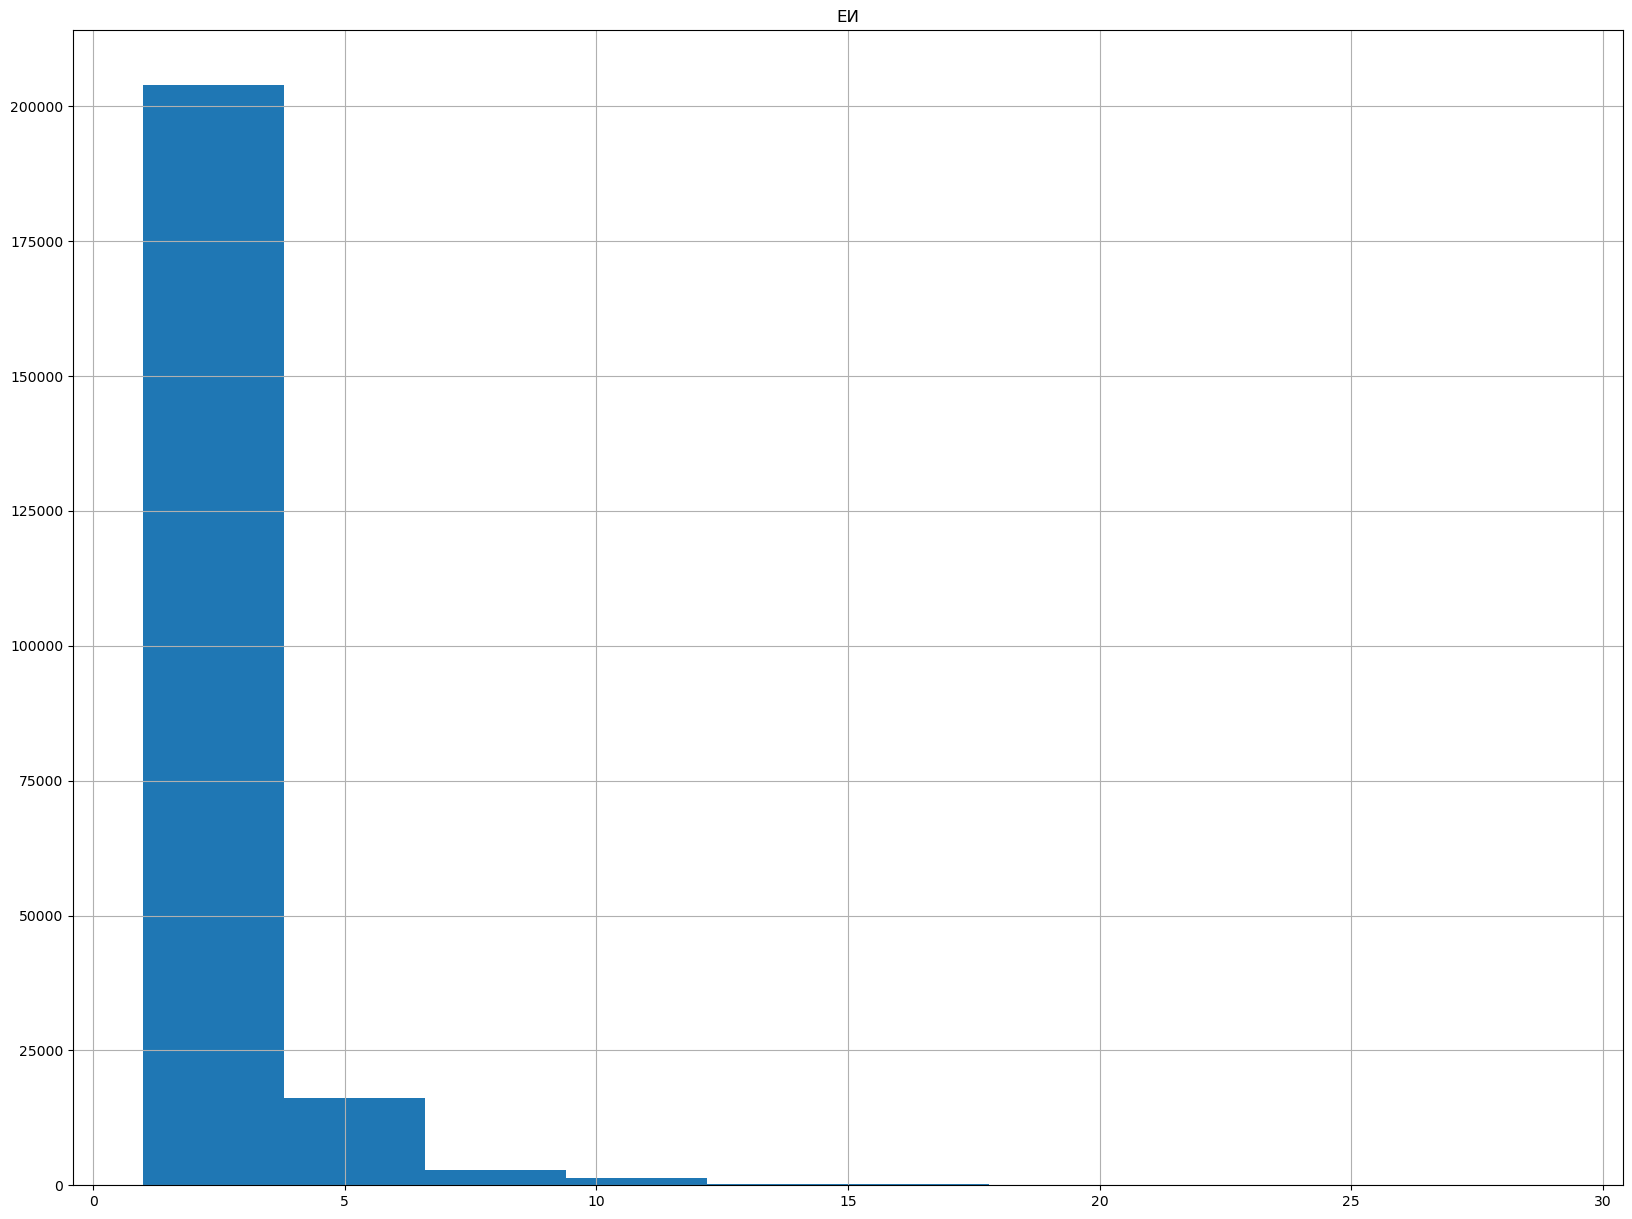

In [5]:
get_info(train)

In [6]:
#распределение целевого
train['y'].value_counts(normalize=True)

0    0.85628
1    0.14372
Name: y, dtype: float64

Duplicates: 103
Table shape: (25000, 42)

Columns:


['Поставщик',
 'Материал',
 'Категорийный менеджер',
 'Операционный менеджер',
 'Завод',
 'Закупочная организация',
 'Группа закупок',
 'Балансовая единица',
 'ЕИ',
 'Группа материалов',
 'Вариант поставки',
 'НРП',
 'Длительность',
 'До поставки',
 'Месяц1',
 'Месяц2',
 'Месяц3',
 'День недели 2',
 'Сумма',
 'Количество',
 'Количество обработчиков 7',
 'Количество обработчиков 15',
 'Количество обработчиков 30',
 'Согласование заказа 1',
 'Согласование заказа 2',
 'Согласование заказа 3',
 'Изменение даты поставки 7',
 'Изменение даты поставки 15',
 'Изменение даты поставки 30',
 'Отмена полного деблокирования заказа на закупку',
 'Изменение позиции заказа на закупку: изменение даты поставки на бумаге',
 'Изменение позиции заказа на закупку: дата поставки',
 'Количество циклов согласования',
 'Количество изменений после согласований',
 'Дней между 0_1',
 'Дней между 1_2',
 'Дней между 2_3',
 'Дней между 3_4',
 'Дней между 4_5',
 'Дней между 5_6',
 'Дней между 6_7',
 'Дней между 7_8']

Null values:


Поставщик                                                                 0
Материал                                                                  0
Категорийный менеджер                                                     0
Операционный менеджер                                                     0
Завод                                                                     0
Закупочная организация                                                    0
Группа закупок                                                            0
Балансовая единица                                                        0
ЕИ                                                                        0
Группа материалов                                                         0
Вариант поставки                                                          0
НРП                                                                       0
Длительность                                                              0
До поставки 

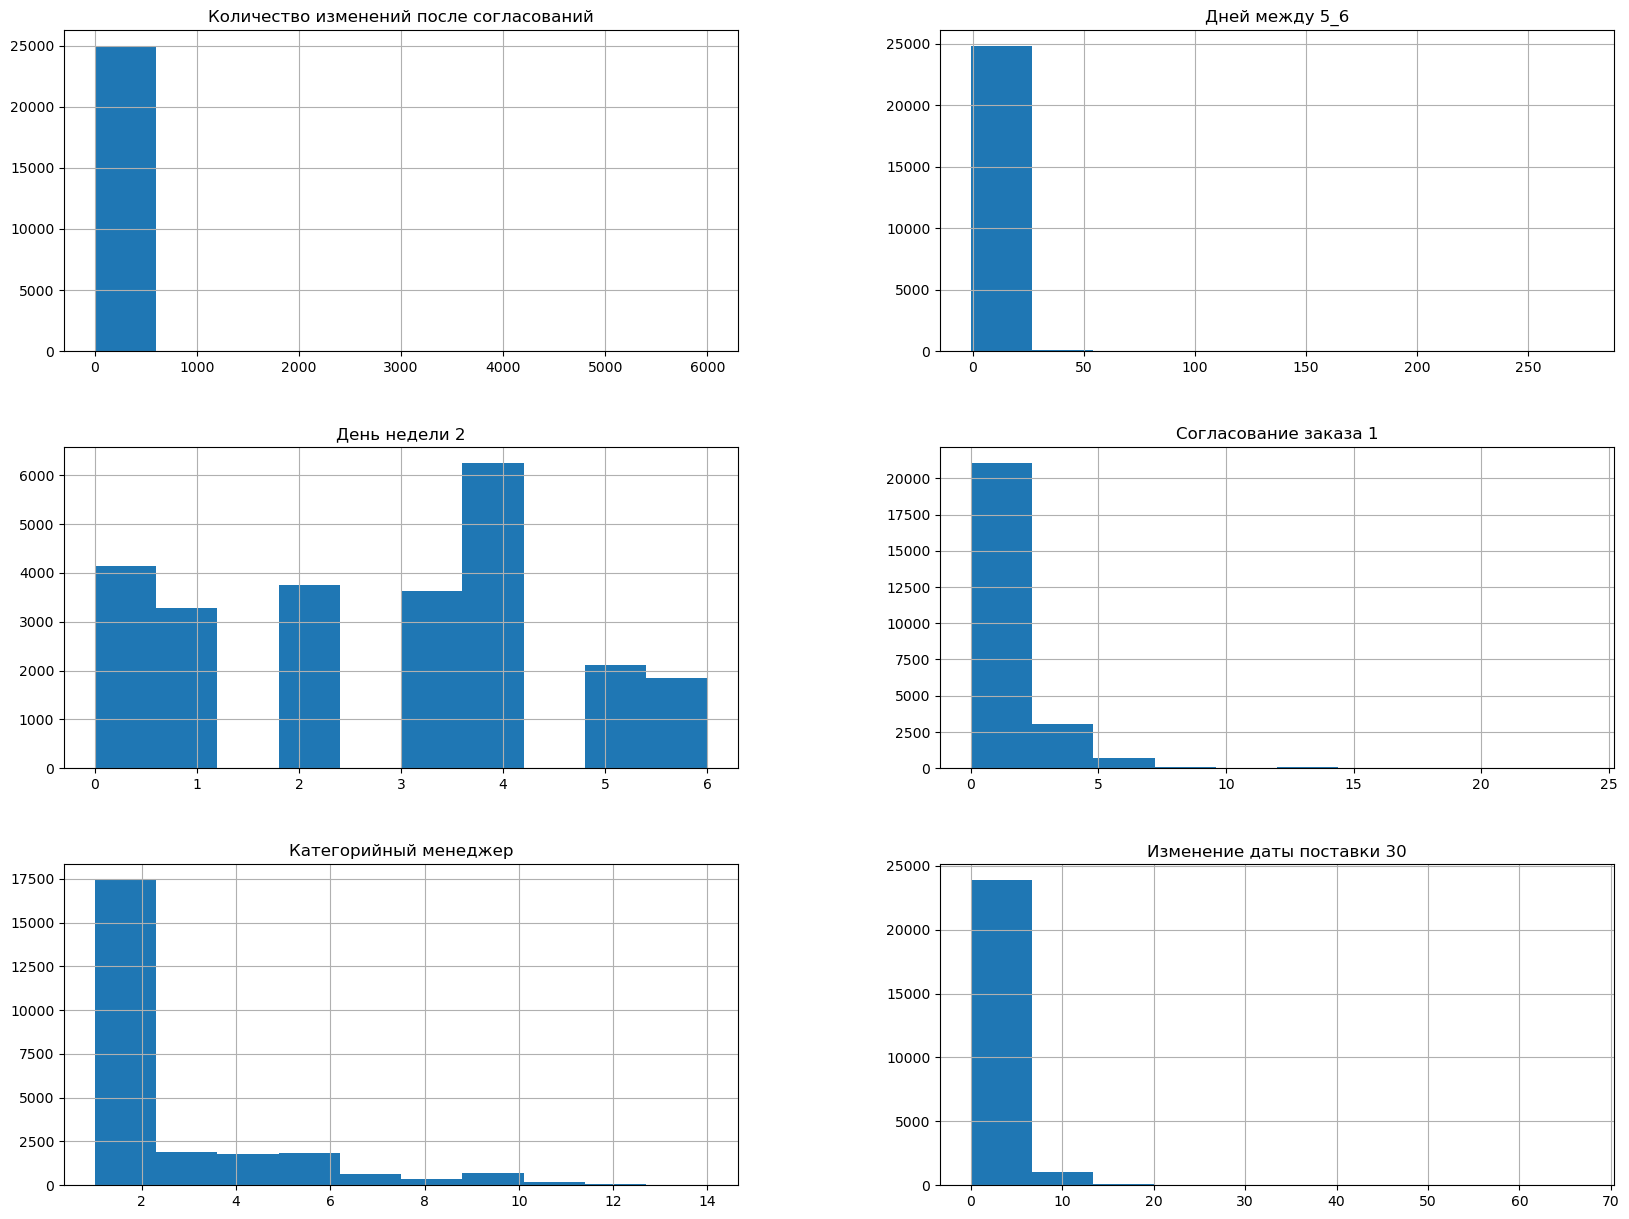

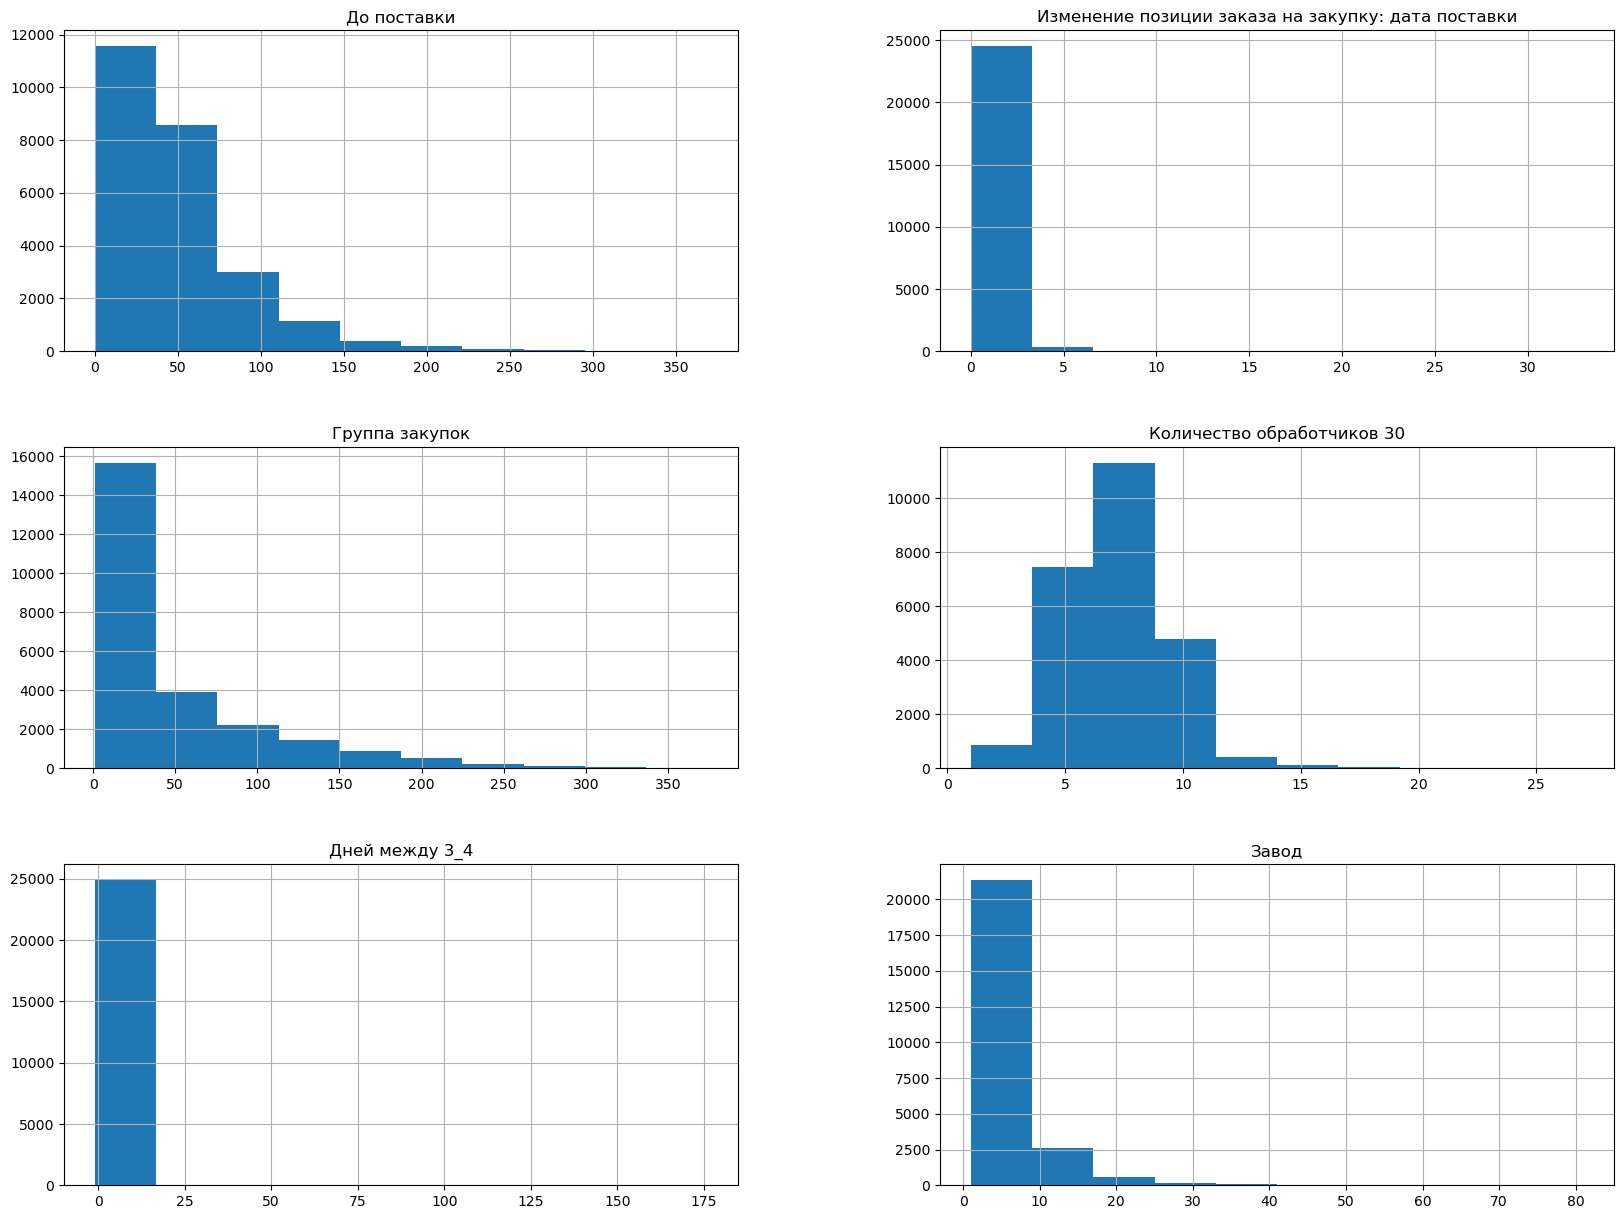

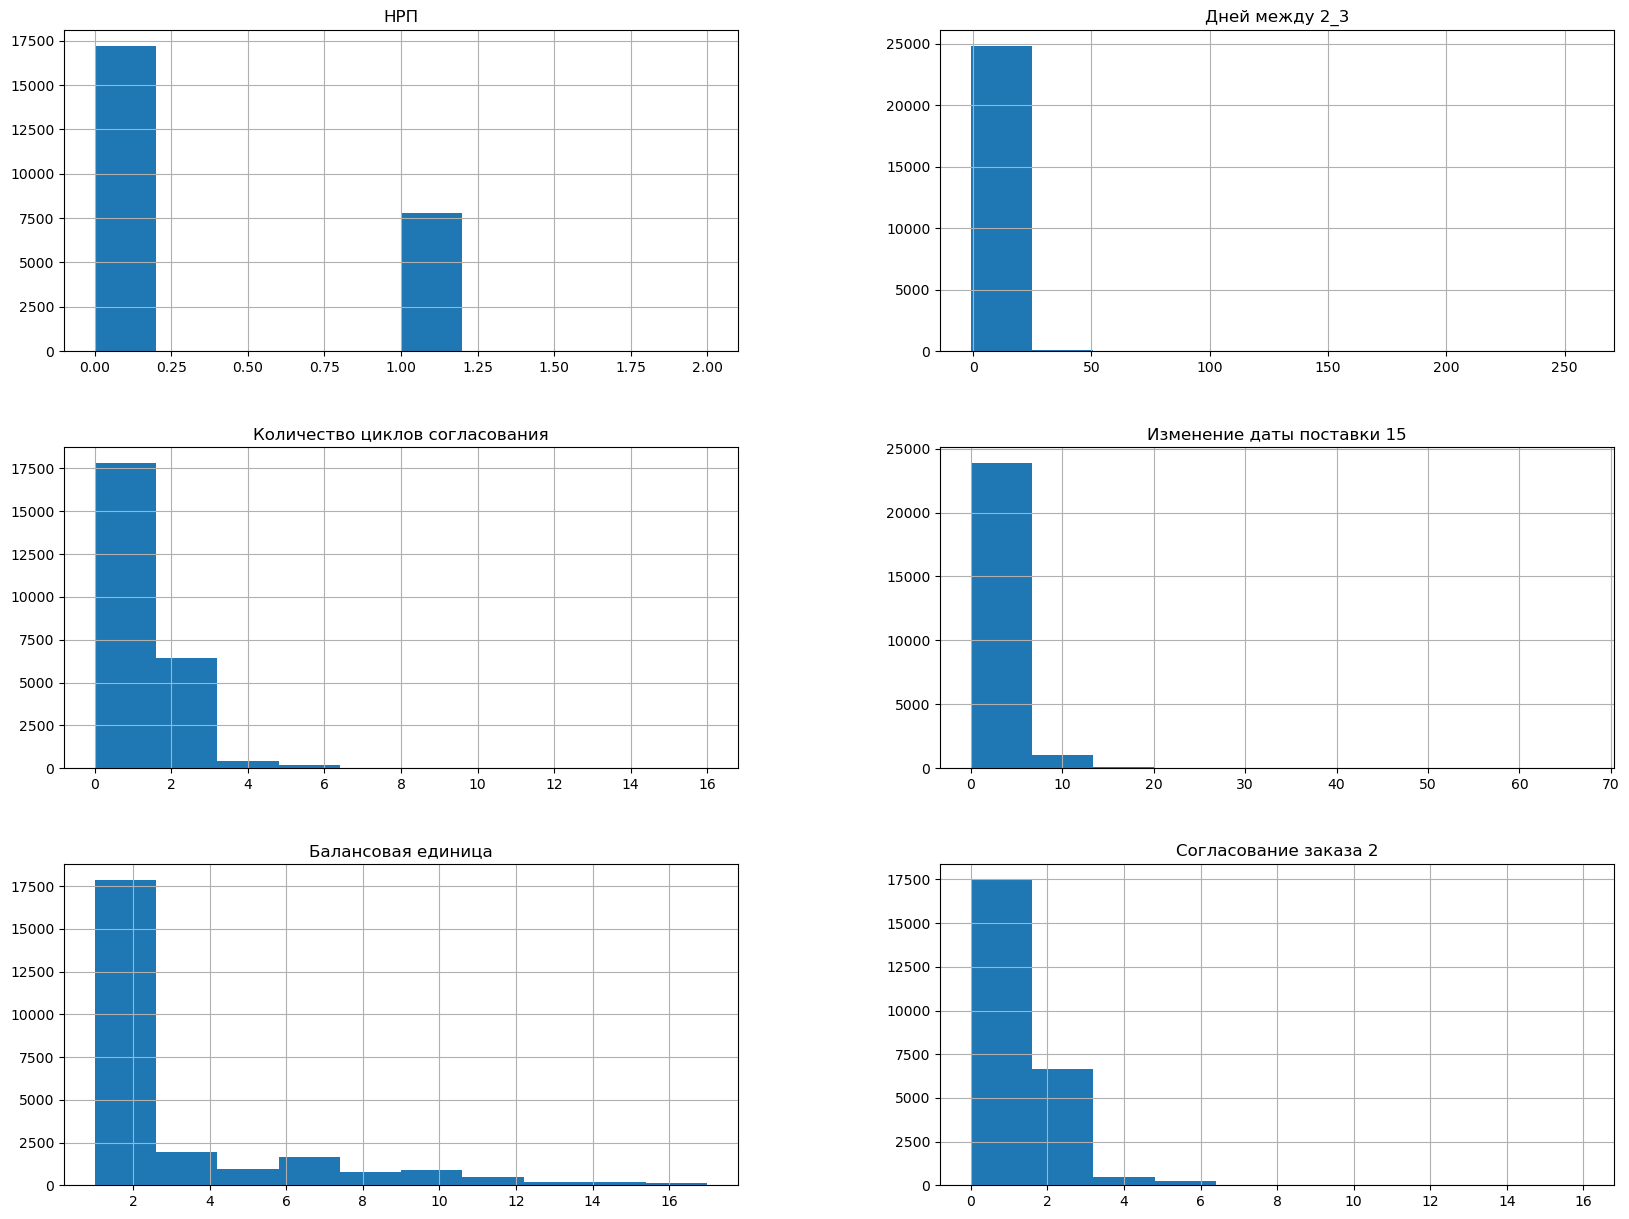

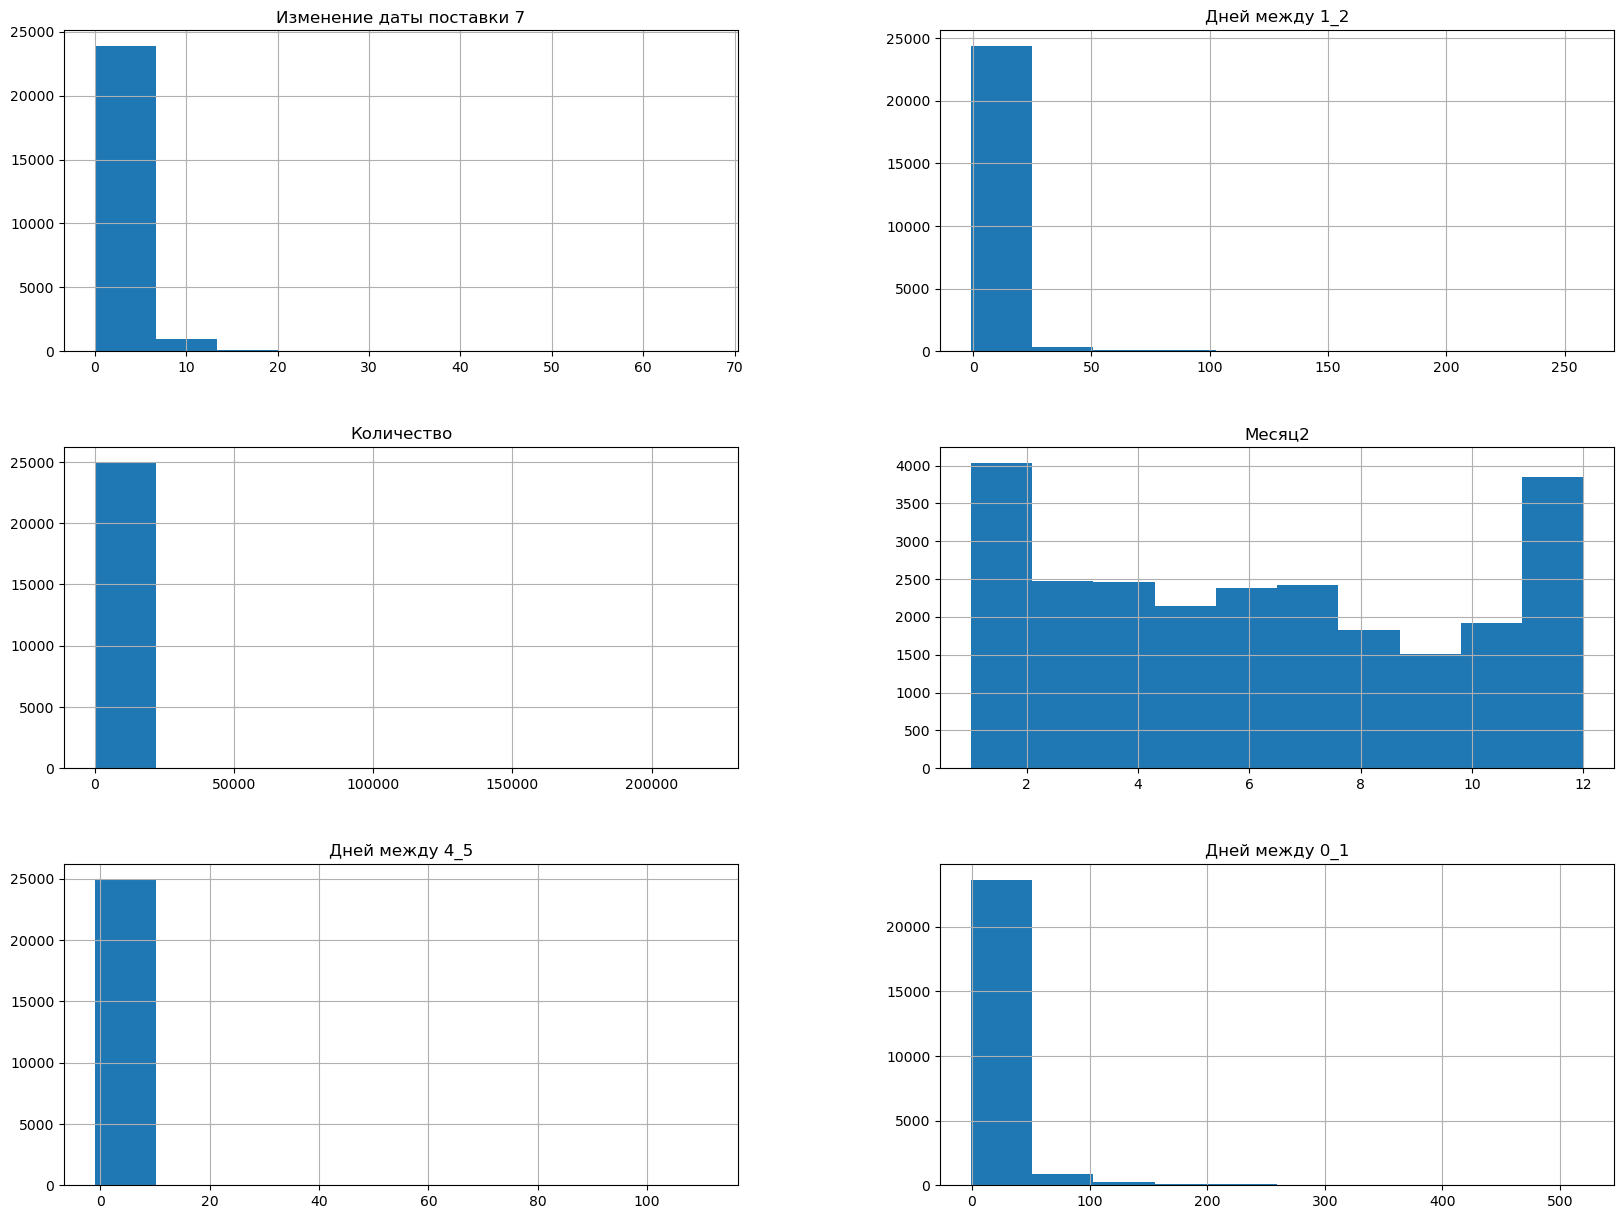

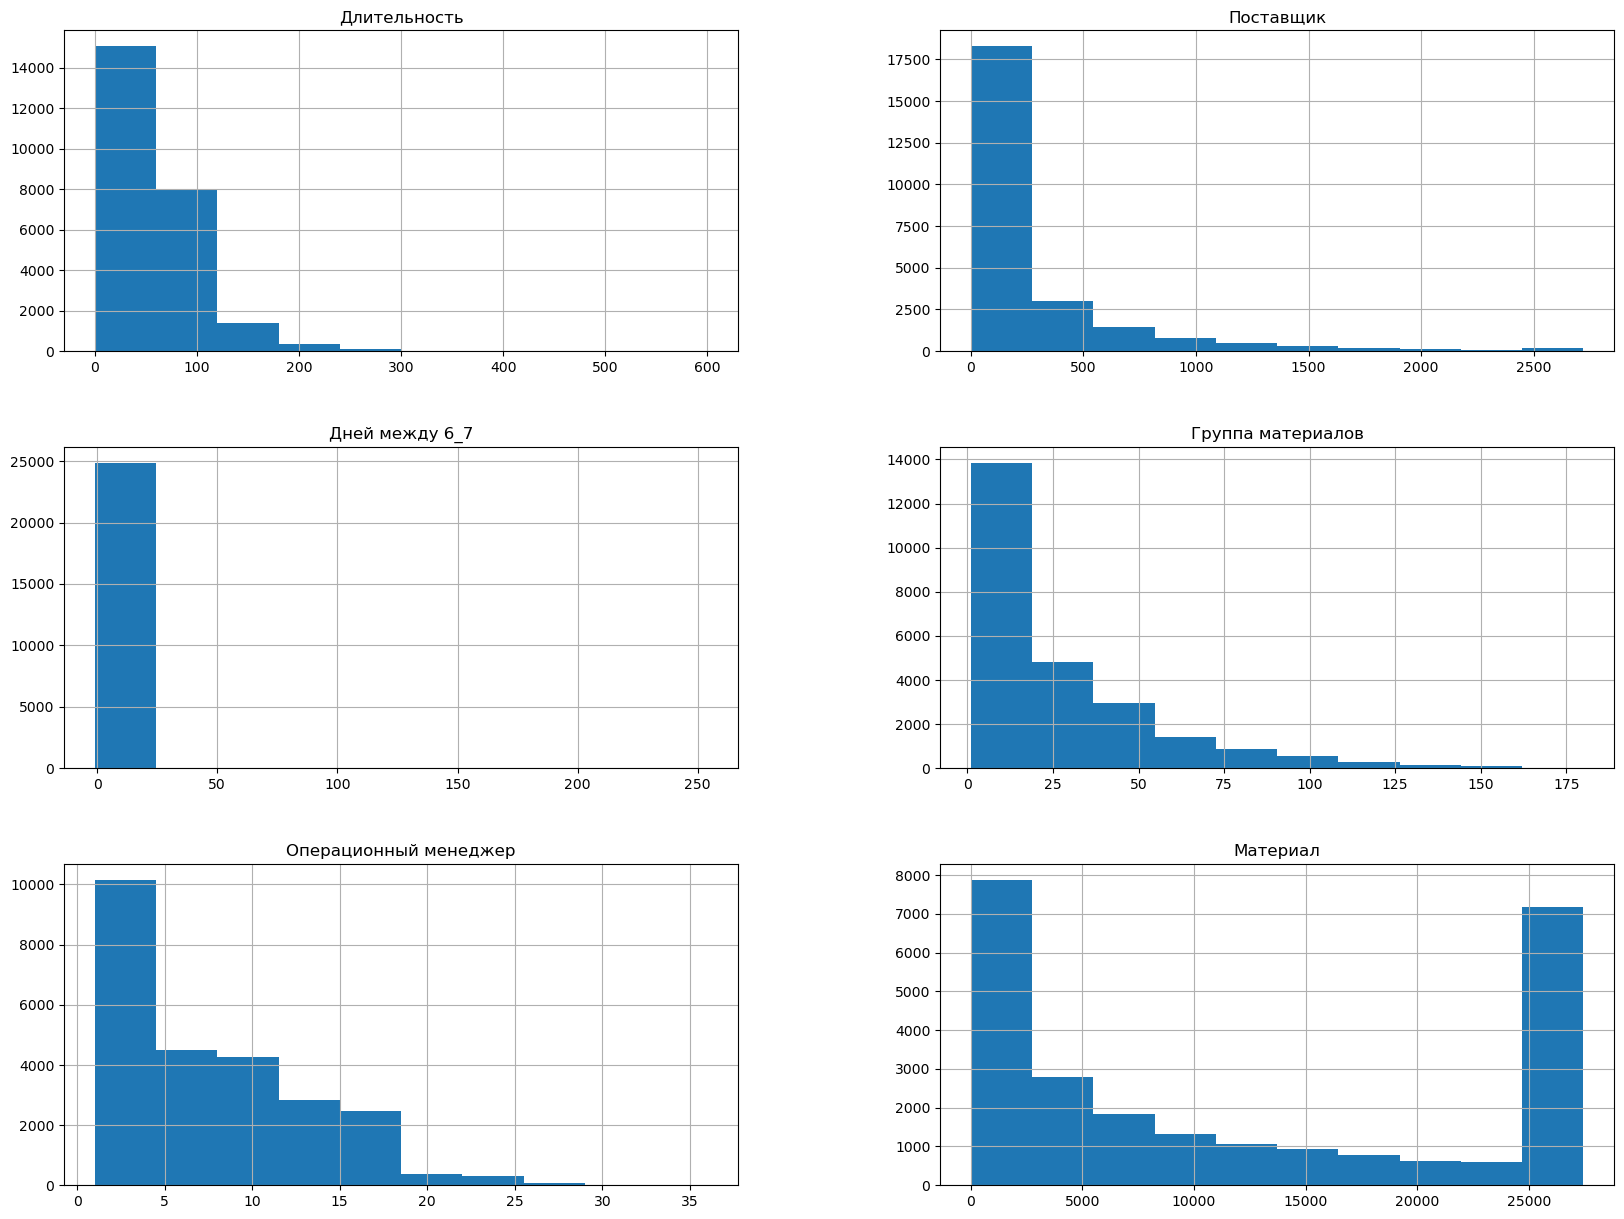

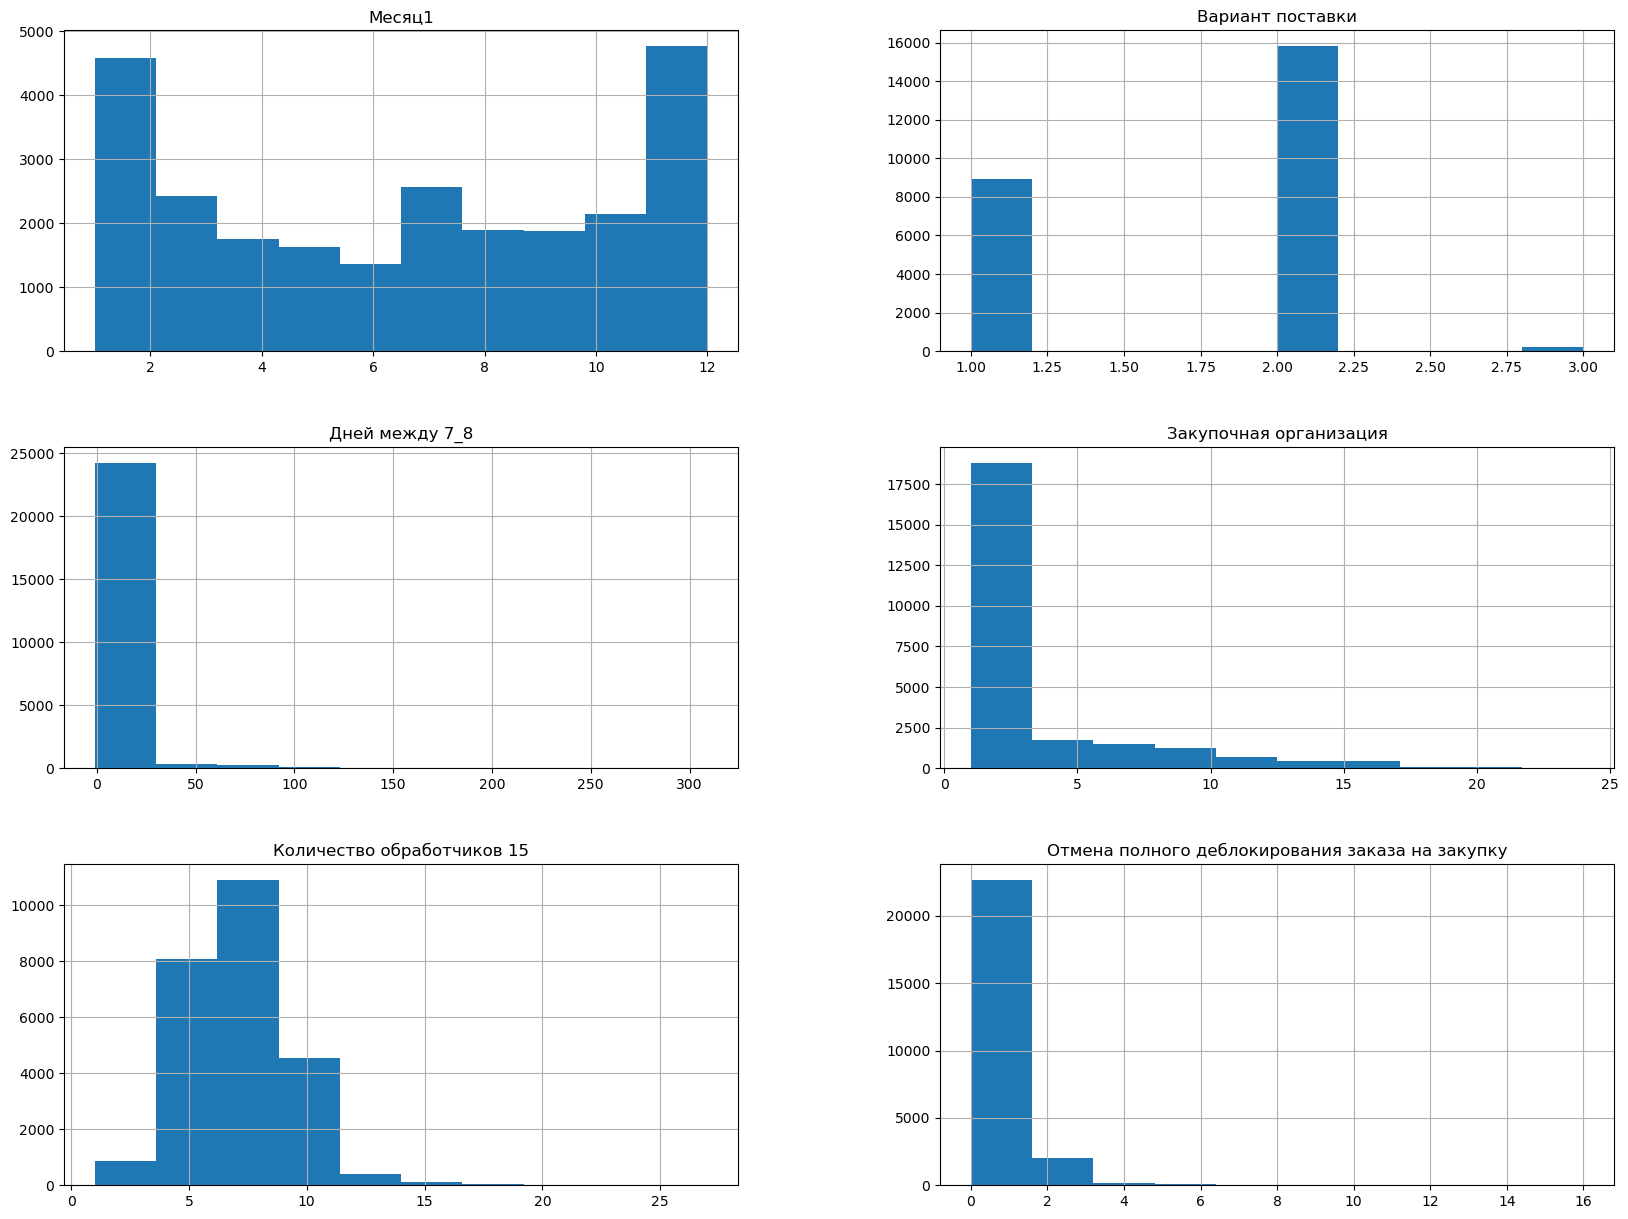

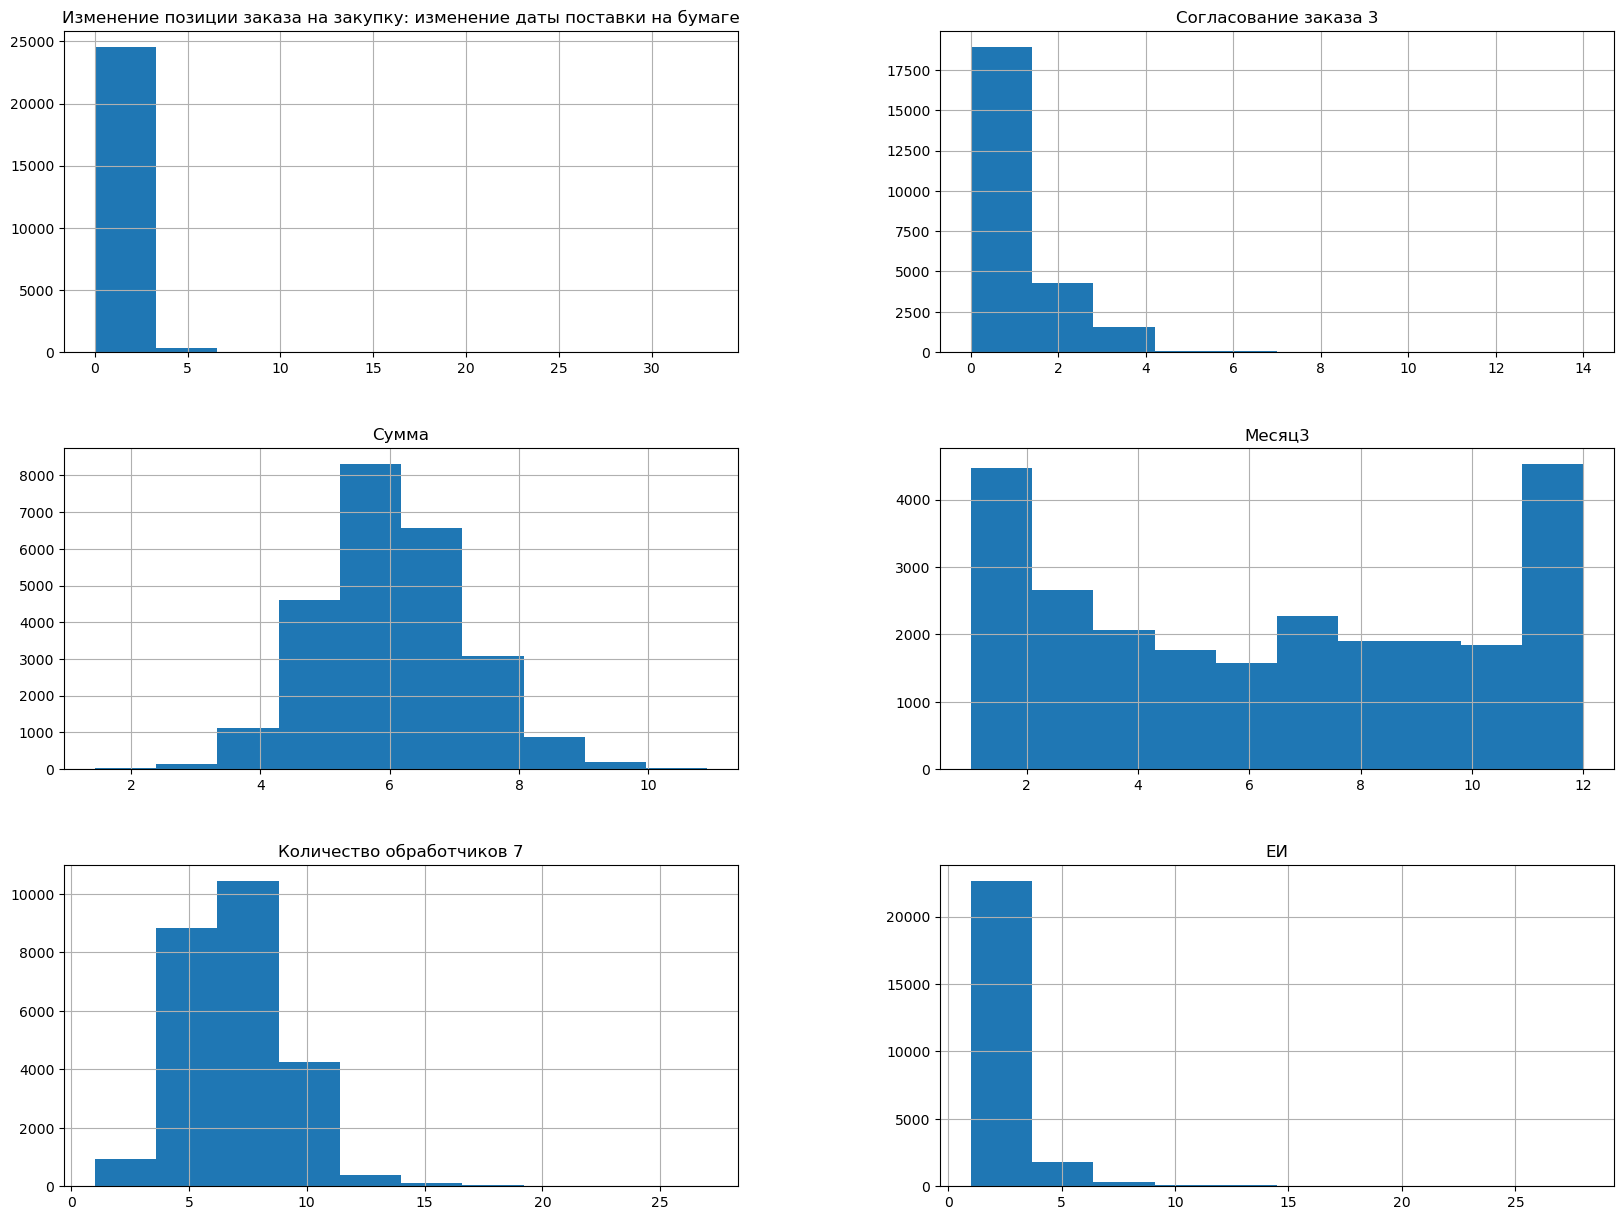

In [7]:
get_info(test)

### Вывод:
- **Познакомились с данными:**
    - **Таблица `train`: 225к объектов, 44 признака, пропусков не обнаружено, присутствуют дубликаты, удалим их**
    - **Таблица `test`: 25к объектов, 43 признака, пропусков не обнаружено, присутствуют дубликаты**
- **Целевой признак с дисбалансом классов 0: 0.856, 1: 0.143, то есть 85% выполняются вовремя и примерно по 15% заказам срываются сроки**

In [8]:
#удалим дубликаты
train = train.drop_duplicates().reset_index(drop=True)
train.head()

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,...,Количество изменений после согласований,Дней между 0_1,Дней между 1_2,Дней между 2_3,Дней между 3_4,Дней между 4_5,Дней между 5_6,Дней между 6_7,Дней между 7_8,y
0,606,7448,4,5,1,1,9,1,1,150,...,11,82.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1
1,7,27439,1,1,21,15,255,12,3,12,...,11,12.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
2,318,27213,1,20,11,12,4,1,1,11,...,12,27.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0
3,1768,19949,5,2,1,1,55,1,1,34,...,14,2.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0
4,7,27439,1,1,12,9,8,1,3,12,...,7,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0


In [9]:
#функия вернет значение f1_macro
def make_predict(data, model):
    data = data.copy()
    
    scaler = StandardScaler()
    
    X = data.drop(['y'], axis=1)
    y = data['y']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score = f1_score(y_test, y_pred, average='macro')
    return score

**baseline_predictions**

In [10]:
%%time
make_predict(train, LogisticRegression(n_jobs=-1, max_iter=1000))

Wall time: 25.2 s


0.5998616713553796

In [11]:
%%time
make_predict(train, DecisionTreeClassifier(random_state=1, max_depth=10))

Wall time: 10.2 s


0.6789294117142481

### Вывод:
- **Сделали предсказания моделями получили следующий результат:**
    - **LR_BASELINE = 0.5999**
    - **DT_BASELINE = 0.6789**
- **Остановимся на дереве решений, далее посмотрим график корреляций, попробуем сделать полезных признаков**


In [12]:
train.corr().style.format(precision=2).background_gradient(cmap='coolwarm')

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,Вариант поставки,НРП,Длительность,До поставки,Месяц1,Месяц2,Месяц3,День недели 2,Сумма,Количество,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30,Согласование заказа 1,Согласование заказа 2,Согласование заказа 3,Изменение даты поставки 7,Изменение даты поставки 15,Изменение даты поставки 30,Отмена полного деблокирования заказа на закупку,Изменение позиции заказа на закупку: изменение даты поставки на бумаге,Изменение позиции заказа на закупку: дата поставки,Количество циклов согласования,Количество изменений после согласований,Дней между 0_1,Дней между 1_2,Дней между 2_3,Дней между 3_4,Дней между 4_5,Дней между 5_6,Дней между 6_7,Дней между 7_8,y
Поставщик,1.00,0.18,-0.01,0.19,0.16,0.16,0.34,0.19,0.07,0.26,0.06,0.02,0.05,0.03,0.02,0.05,0.02,-0.00,0.29,0.07,0.01,0.00,0.00,-0.15,-0.10,-0.14,0.00,0.00,0.00,-0.09,0.03,0.03,-0.10,0.01,0.05,-0.04,0.00,-0.04,-0.02,0.05,0.03,0.05,0.06
Материал,0.18,1.00,0.04,0.13,-0.02,0.06,0.18,0.11,-0.10,-0.03,-0.07,0.19,0.11,0.11,-0.01,0.03,0.01,0.01,0.12,-0.03,-0.02,-0.01,-0.01,-0.04,-0.02,0.01,0.09,0.09,0.09,-0.04,0.07,0.08,-0.03,-0.04,0.01,-0.10,0.00,-0.02,-0.01,0.02,0.03,0.12,0.05
Категорийный менеджер,-0.01,0.04,1.00,0.20,-0.11,-0.16,0.09,-0.13,-0.03,0.06,-0.22,0.05,0.13,0.14,-0.04,-0.03,-0.05,0.04,0.18,0.02,0.19,0.19,0.18,0.10,0.05,0.14,0.04,0.04,0.04,0.02,0.02,0.04,0.04,0.02,0.03,-0.00,0.03,0.04,0.05,0.00,0.00,0.02,0.00
Операционный менеджер,0.19,0.13,0.20,1.00,0.04,0.20,0.19,0.13,0.00,0.14,0.09,0.02,0.06,0.04,-0.03,0.03,-0.02,-0.00,0.11,0.01,0.04,0.05,0.05,-0.08,-0.00,-0.09,0.01,0.02,0.02,-0.04,-0.03,0.02,0.00,0.00,0.02,-0.05,0.02,-0.03,-0.01,0.06,0.05,0.02,-0.03
Завод,0.16,-0.02,-0.11,0.04,1.00,0.61,0.15,0.70,0.07,0.11,0.16,-0.08,-0.19,-0.23,0.02,0.05,0.03,-0.03,0.10,0.05,-0.24,-0.25,-0.26,-0.17,-0.08,-0.24,-0.13,-0.13,-0.13,-0.00,-0.16,-0.12,-0.08,0.04,-0.07,-0.03,-0.06,-0.08,-0.08,-0.01,-0.01,-0.03,0.06
Закупочная организация,0.16,0.06,-0.16,0.20,0.61,1.00,0.16,0.70,0.07,0.08,0.29,-0.05,-0.19,-0.23,-0.00,0.06,0.02,-0.04,0.07,0.01,-0.34,-0.34,-0.35,-0.29,-0.17,-0.35,-0.12,-0.12,-0.12,-0.09,-0.17,-0.11,-0.17,-0.03,-0.07,-0.10,-0.08,-0.10,-0.11,0.00,0.01,-0.03,0.08
Группа закупок,0.34,0.18,0.09,0.19,0.15,0.16,1.00,0.19,0.03,0.28,-0.04,0.05,0.07,0.06,0.02,0.03,0.02,0.03,0.30,0.05,0.03,0.03,0.03,-0.07,-0.05,-0.05,0.00,0.00,0.00,-0.05,0.01,0.01,-0.05,0.02,0.02,-0.06,0.02,-0.01,0.00,0.03,0.03,0.05,0.04
Балансовая единица,0.19,0.11,-0.13,0.13,0.70,0.70,0.19,1.00,0.03,0.12,0.20,-0.04,-0.15,-0.21,0.05,0.09,0.07,-0.03,0.02,0.01,-0.30,-0.30,-0.31,-0.28,-0.12,-0.33,-0.12,-0.12,-0.12,-0.08,-0.16,-0.11,-0.11,-0.04,-0.06,-0.09,-0.08,-0.10,-0.11,0.00,-0.01,-0.03,0.06
ЕИ,0.07,-0.10,-0.03,0.00,0.07,0.07,0.03,0.03,1.00,0.20,0.06,0.01,-0.11,-0.12,-0.02,0.00,-0.01,0.01,0.12,0.02,0.04,0.04,0.03,0.02,0.02,0.01,-0.04,-0.04,-0.04,0.04,-0.05,-0.05,0.01,0.04,-0.00,-0.03,0.01,-0.01,-0.00,-0.00,-0.01,-0.03,0.07
Группа материалов,0.26,-0.03,0.06,0.14,0.11,0.08,0.28,0.12,0.20,1.00,0.03,-0.02,-0.02,-0.05,0.01,0.04,0.01,0.02,0.18,0.05,0.04,0.04,0.04,-0.05,-0.01,-0.02,-0.04,-0.04,-0.04,-0.00,-0.01,-0.03,-0.01,0.05,0.04,-0.08,-0.01,-0.02,-0.02,0.02,0.01,-0.00,0.03


# Feature Engineering

In [13]:
def get_more_features(data):
    data = data.copy()
    
    data['Ранняя_поставка_дней'] = data['Длительность'] - data['До поставки'] # 0.7522
    
    data['Бал_ед_Закуп_орг'] =  data['Закупочная организация'] / data['Балансовая единица'] 
    data['Бал_ед_завод'] = data['Завод'] / data['Балансовая единица']
    
    data['Поставщик_Груп_закуп'] = data['Поставщик'] * data['Группа закупок']
    
    data['Сумма_Зак_орг'] = data['Сумма'] / data['Закупочная организация'] 
    
    data['Кол_об7_Зак_орг'] = data['Количество обработчиков 7'] * data['Закупочная организация']
    data['Кол_об15_Зак_орг'] = data['Количество обработчиков 15'] * data['Закупочная организация']
    data['Кол_об30_Зак_орг'] = data['Количество обработчиков 30'] / data['Закупочная организация']
    
    data['Сумма_Постав'] = data['Сумма'] / data['Поставщик']
    data['Сумма_Гр_мат'] = data['Сумма'] / data['Группа материалов']
    data['Сумма_Кат_менедж'] = data['Сумма'] / data['Категорийный менеджер']
    
    data['Поставщик_Груп_мат'] = data['Поставщик'] * data['Группа материалов']

    data['Дней_между_4_5_sub_Дней_между_3_4'] = data['Дней между 4_5'] - data['Дней между 3_4']
    
    data['Кол_цик_согл_Зак_орг'] = data['Количество циклов согласования'] / data['Закупочная организация'] 

    data['Вар_пост_Кат_менед'] = data['Вариант поставки'] * data['Категорийный менеджер'] # 0.7862
    data['Вар_пост_Зак_орг'] = data['Вариант поставки'] * data['Закупочная организация'] # 0.7874
    
    
    data = data.drop(['Балансовая единица', 'Закупочная организация', 
                      'Завод', 'Поставщик', 'Группа закупок',
                      'Вариант поставки', 'Сумма',
                      'Количество обработчиков 7', 'Количество обработчиков 15', 
                      'Количество обработчиков 30', 'Группа материалов',
                      'Дней между 3_4', 'Дней между 4_5',
                      'Количество циклов согласования', ], axis=1)
    return data

In [14]:
make_predict(get_more_features(train), DecisionTreeClassifier(random_state=1, max_depth=10))

0.7874754047553107

- **data['Балансовая единица'] * data['Закупочная организация'] = 0.7534**
- **data['Закупочная организация'] / data['Балансовая единица'] = 0.7576**
- **data['Балансовая единица'] / data['Закупочная организация'] = 0.7574**


- **data['Балансовая единица'] / data['Завод'] = 0.7587**
- **data['Завод'] / data['Балансовая единица']  = 0.7587**


- **data['Поставщик'] * data['Группа закупок'] = 0.7599** 
- **data['Поставщик'] / data['Группа закупок'] = 0.7508**
- **data['Группа закупок'] / data['Поставщик'] = 0.7510**



- **data['Вариант поставки'] * data['Закупочная организация'] = 0.7440**
- **data['Закупочная организация'] / data['Вариант поставки'] = 0.7480**
- **data['Вариант поставки'] / data['Закупочная организация'] = 0.7479**



- **data['Сумма'] / data['Закупочная организация'] = 0.7618**
- **data['До поставки'] / data['Закупочная организация'] = 0.7596**
- **data['Закупочная организация'] / data['До поставки'] = inf**



- **data['Закупочная организация'] * data['Количество обработчиков 7'] = 0.7625**
- **data['Закупочная организация'] / data['Количество обработчиков 7'] = 0.7546**
- **data['Количество обработчиков 7'] / data['Закупочная организация'] = 0.7543**



- **data['Количество обработчиков 15'] * data['Закупочная организация'] = 0.7741**
- **data['Количество обработчиков 30'] * data['Закупочная организация'] = 0.7708**
- **data['Количество обработчиков 30'] / data['Закупочная организация'] = 0.7779**
- **data['Закупочная организация'] / data['Количество обработчиков 30'] = 0.7772**



- **data['Количество обработчиков 7'] * data['Балансовая единица'] = 0.7768**
- **data['Количество обработчиков 7'] / data['Балансовая единица'] = 0.7778**



- **data['Согласование заказа 1'] * data['Закупочная организация'] = 0.7719**
- **data['Согласование заказа 1'] / data['Закупочная организация'] = 0.7766**
- **data['Закупочная организация'] / data['Согласование заказа 1'] = inf**



- **data['Сумма'] / data['Поставщик'] = 0.7805**


- **data['Сумма'] / data['Группа материалов'] = 0.7812**
- **data['Сумма'] / data['Категорийный менеджер'] = 0.7838**



- **data['Сумма'] / data['Операционный менеджер'] = 0.7762**
- **data['Сумма'] * data['Операционный менеджер'] = 0.7738**



- **data['Сумма'] / data['Группа закупок'] = 0.7807**
- **data['Поставщик'] * data['Группа материалов'] = 0.7851**
- **data['Поставщик'] / data['Группа материалов'] = 0.7822**



- **data['Материал'] * data['Группа закупок'] = 0.7819**
- **data['ЕИ'] * data['Группа материалов'] = 0.7848**
- **data['ЕИ'] / data['Группа материалов'] = 0.7845**


- **data['Согласование заказа 2'] / data['Закупочная организация'] = 0.7849**
- **data['Согласование заказа 3'] / data['Закупочная организация'] = 0.7824**



- **data['Завод'] * data['Количество обработчиков 7'] = 0.7841**
- **data['Завод'] / data['Количество обработчиков 7'] = 0.7848**


 
- **data['Завод'] / ((data['Количество обработчиков 7'] + ... + data['Количество обработчиков 30'])) = 0.7815**
- **data['Отмена полного деблокирования заказа на закупку'] /* data['Количество изменений после согласований'] = 0.77**
- **data['Длительность'] * data['Дней между 0_1'] = 0.7834**


 
- **data['Количество обработчиков 7'] * data['Количество изменений после согласований'] = 0.7756**
- **data['Изменение даты поставки 7'] * data['Дней между 7_8'] = 0.7851**


- **data['Дней между 3_4'] - data['Дней между 4_5'] = 0.7846**
- **data['Дней между 3_4'] - data['Дней между 4_5'] = 0.7849**
- **data['Дней между 4_5'] - data['Дней между 3_4'] = 0.7853**
- **data['Дней между 2_3'] - data['Дней между 1_2'] = 0.7853**


 
- **data['Количество циклов согласования'] * data['Закупочная организация'] = 0.7796**
- **data['Количество циклов согласования'] / data['Закупочная организация'] = 0.7857**



- **data['НРП'] * data['Материал'] = 0.7851**
- **data['НРП'] / data['Материал'] = 0.7851**



- **data['Вариант поставки'] * data['Категорийный менеджер'] = 0.7862**
- **data['Вариант поставки'] * data['Закупочная организация'] = 0.7874**
- **data['Вариант поставки'] * data['Балансовая единица'] = 0.7853**
- **data['Сумма'] / data['Материал'] = 0.7870**



### Вывод:
- **Изучили график корреляций, попробовали объединить коррелирующие признаки/сделать на их основе более сильный признак**
- **По итогу увеличили значения f1 с 0.75 до 0.78**
---

In [15]:
train = get_more_features(train).copy()
display(train.shape)
train.head()

(220248, 45)

,Материал,Категорийный менеджер,Операционный менеджер,ЕИ,НРП,Длительность,До поставки,Месяц1,Месяц2,Месяц3,...,Кол_об15_Зак_орг,Кол_об30_Зак_орг,Сумма_Постав,Сумма_Гр_мат,Сумма_Кат_менедж,Поставщик_Груп_мат,Дней_между_4_5_sub_Дней_между_3_4,Кол_цик_согл_Зак_орг,Вар_пост_Кат_менед,Вар_пост_Зак_орг
0,7448,4,5,1,0.0,190,190,10,4,1,...,4,4.000000,0.011123,0.044938,1.685181,90900,0.0,1.000000,4,1
1,27439,1,1,3,1.0,17,12,9,9,9,...,105,0.466667,1.125239,0.656389,7.876672,84,0.0,0.000000,2,30
2,27213,1,20,1,1.0,67,43,5,7,6,...,60,0.500000,0.015816,0.457229,5.029520,3498,0.0,0.083333,2,24
3,19949,5,2,1,0.0,83,66,12,2,12,...,7,7.000000,0.003387,0.176114,1.197576,60112,0.0,1.000000,5,1
4,27439,1,1,3,0.0,21,18,12,12,12,...,18,0.222222,1.119861,0.653252,7.839027,84,0.0,0.000000,2,18


### Вывод:
- **Попробовали сделать признаки, далее попробуем поработать с дисбалансом классов и различные модели, признак 'Ранняя_поставка_дней' оставим**

In [16]:
#попробуем случайный лес
make_predict(train, RandomForestClassifier(random_state=1, 
                                           max_depth=10, 
                                           n_jobs=-1))

0.7133620642332128

# Работа с дисбалансом
- **Разобьем данные по 50% на обучение и валидацию**
- **Далее на трейне будем пробовать менять размеры классов и проверять на валидационной выборке, так полученная оценка будет объективной и мы избежим переобучения**

In [17]:
size = len(train)//2

train = shuffle(train, random_state=1).copy()

valid = train.iloc[size:].copy()
train = train.iloc[:size].copy()

valid.shape, train.shape

((110124, 45), (110124, 45))

In [18]:
#распределение целевого в выборках после разбиения
pd.DataFrame({'y_train': train['y'].value_counts(normalize=True), 
              'y_valid': valid['y'].value_counts(normalize=True)})

,y_train,y_valid
0,0.856108,0.856135
1,0.143892,0.143865


**Функция `predict_valid:` обучаем модель на трейне, получаем предсказания на валидационной, смотреть будем на все метрики, дополнительно на матрицу ошибок**

In [19]:
def predict_valid(data, model):

    X_train = data.drop(['y'], axis=1)
    y_train = data['y']
    
    X_test = valid.drop(['y'], axis=1)
    y_test = valid['y']
    
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score = f1_score(y_test, y_pred, average='macro')
    clf_report = classification_report(y_test, y_pred)
    print(clf_report)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'TN: {tn}\nFP: {fp}\nFN: {fn}\nTP: {tp}')
    return score

In [20]:
predict_valid(train, DecisionTreeClassifier(random_state=1, max_depth=10))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     94281
           1       0.69      0.53      0.60     15843

    accuracy                           0.90    110124
   macro avg       0.81      0.74      0.77    110124
weighted avg       0.89      0.90      0.89    110124

TN: 90475
FP: 3806
FN: 7499
TP: 8344


0.7686734627403438

- **`baseline = 0.7686`**

**Функция `method:` передаем данные и функцию для преобразования выборки, после преобразования обязательно перемешиваем, чтобы minor и major классы распредилились по всему датасету, а не сгруппировались в одной части**

In [21]:
def method(data, method):
    data = data.copy()  
    method = method  
    
    y = data['y']
    X = data.drop(['y'], axis=1)

    X_res, y_res = method.fit_resample(X, y)
    
    data = shuffle(pd.concat([X_res, y_res], axis=1), random_state=1)
    print(data['y'].value_counts(normalize=True))
    return data

# OVER SAMPLING MINOR CLASS
- **Попробуем увеличить класс 1**

## SMOTE
- **Генерируются новые объекты на основе метода k-ближайших соседей**

- `Преимущества:`
    - Данные не повторяются
- `Недостатки:`
    - Генерируются новые данные, которых не было в выборке



In [22]:
result = defaultdict(list)
for ss in [0.2, 0.25, 0.3, 0.35]:
    for k in tqdm(range(1, 4+1)):
        result[f'ss{ss}_k{k}'] = predict_valid(method(train,  SMOTE(sampling_strategy=ss, 
                                                   random_state=1, 
                                                   k_neighbors=k)),
       DecisionTreeClassifier(random_state=1, max_depth=10))
    
pd.DataFrame(result.items(), columns=['key', 'value']).sort_values(by='value', ascending=False)

  0%|          | 0/4 [00:00<?, ?it/s]

0    0.833338
1    0.166662
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     94281
           1       0.65      0.56      0.60     15843

    accuracy                           0.89    110124
   macro avg       0.79      0.76      0.77    110124
weighted avg       0.89      0.89      0.89    110124

TN: 89478
FP: 4803
FN: 6911
TP: 8932
0    0.833338
1    0.166662
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     94281
           1       0.65      0.59      0.62     15843

    accuracy                           0.89    110124
   macro avg       0.79      0.77      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 89221
FP: 5060
FN: 6551
TP: 9292
0    0.833338
1    0.166662
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     94281
       

  0%|          | 0/4 [00:00<?, ?it/s]

0    0.800003
1    0.199997
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     94281
           1       0.62      0.60      0.61     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.77      0.77    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88442
FP: 5839
FN: 6277
TP: 9566
0    0.800003
1    0.199997
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     94281
           1       0.62      0.61      0.61     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.77      0.77    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88238
FP: 6043
FN: 6163
TP: 9680
0    0.800003
1    0.199997
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     94281
       

  0%|          | 0/4 [00:00<?, ?it/s]

0    0.769233
1    0.230767
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     94281
           1       0.58      0.65      0.61     15843

    accuracy                           0.88    110124
   macro avg       0.76      0.78      0.77    110124
weighted avg       0.89      0.88      0.88    110124

TN: 86902
FP: 7379
FN: 5574
TP: 10269
0    0.769233
1    0.230767
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     94281
           1       0.62      0.61      0.61     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.77      0.77    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88423
FP: 5858
FN: 6257
TP: 9586
0    0.769233
1    0.230767
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     94281
      

  0%|          | 0/4 [00:00<?, ?it/s]

0    0.740742
1    0.259258
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     94281
           1       0.60      0.62      0.61     15843

    accuracy                           0.88    110124
   macro avg       0.77      0.77      0.77    110124
weighted avg       0.89      0.88      0.89    110124

TN: 87628
FP: 6653
FN: 6014
TP: 9829
0    0.740742
1    0.259258
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     94281
           1       0.57      0.70      0.63     15843

    accuracy                           0.88    110124
   macro avg       0.76      0.80      0.78    110124
weighted avg       0.89      0.88      0.89    110124

TN: 85865
FP: 8416
FN: 4795
TP: 11048
0    0.740742
1    0.259258
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     94281
      

,key,value
7,ss0.25_k4,0.782400
13,ss0.35_k2,0.777196
1,ss0.2_k2,0.777186
11,ss0.3_k4,0.776023
9,ss0.3_k2,0.774332
5,ss0.25_k2,0.774314
4,ss0.25_k1,0.774079
2,ss0.2_k3,0.773905
15,ss0.35_k4,0.773581
10,ss0.3_k3,0.773538


### Вывод:
- **Попробовали подобрать долю которую будет иметь 1 класс, и k соседей, по итогам получилось что размер 1 класса составлял бы 25%,сгенерированный на близости по 4 соседям, f1_macro = 0.7824**

## BorderlineSMOTE
- **Расширение SMOTE, которое использует для создания новых объектов только те объекты  1 класса, которые располагаются недалеко от границы с 0 классом.**

- **Обучает KNN на всей выборке и ищет объекты 1 класса, все ближайшие соседи которого относятся к 0 классу. Эта группа объектов называется DANGER-группой.**
- **Обучает KNN на всех объектах 1 класса**
    - kind='borderline-1. Для генерации нового объекта используются объекты DANGER-группы, а в качестве соседей объекты 1 класса.
    - kind='borderline-2. Для генерации нового объекта используются объекты DANGER-группы, а в качестве соседей объекты как 1, так и 0 классов.

- `Преимущества:`
    - Данные не повторяются
- `Недостатки:`
    - Генерируются новые данные, которых не было в выборке

In [23]:
result = defaultdict(list)
for kind in ['borderline-1', 'borderline-2']:
    for ss in [0.2, 0.25, 0.3, 0.35]:
        for k in tqdm(range(1, 4+1)):
            result[f'kind{kind}_ss{ss}_k{k}'] = predict_valid(method(train,  BorderlineSMOTE(sampling_strategy=ss,  
                                                                              random_state=1,  
                                                                              k_neighbors=k,
                                                                              m_neighbors=5,
                                                                              kind=kind)),
                                                              DecisionTreeClassifier(random_state=1, max_depth=10))
    
pd.DataFrame(result.items(), columns=['key', 'value']).sort_values(by='value', ascending=False)

  0%|          | 0/4 [00:00<?, ?it/s]

0    0.833338
1    0.166662
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     94281
           1       0.63      0.60      0.62     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.77      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88676
FP: 5605
FN: 6291
TP: 9552
0    0.833338
1    0.166662
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     94281
           1       0.67      0.57      0.62     15843

    accuracy                           0.90    110124
   macro avg       0.80      0.76      0.78    110124
weighted avg       0.89      0.90      0.89    110124

TN: 89696
FP: 4585
FN: 6740
TP: 9103
0    0.833338
1    0.166662
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     94281
       

  0%|          | 0/4 [00:00<?, ?it/s]

0    0.800003
1    0.199997
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     94281
           1       0.63      0.61      0.62     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.77      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88537
FP: 5744
FN: 6256
TP: 9587
0    0.800003
1    0.199997
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     94281
           1       0.61      0.60      0.61     15843

    accuracy                           0.89    110124
   macro avg       0.77      0.77      0.77    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88145
FP: 6136
FN: 6296
TP: 9547
0    0.800003
1    0.199997
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     94281
       

  0%|          | 0/4 [00:00<?, ?it/s]

0    0.769233
1    0.230767
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     94281
           1       0.60      0.64      0.62     15843

    accuracy                           0.89    110124
   macro avg       0.77      0.79      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 87389
FP: 6892
FN: 5649
TP: 10194
0    0.769233
1    0.230767
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     94281
           1       0.60      0.61      0.61     15843

    accuracy                           0.89    110124
   macro avg       0.77      0.77      0.77    110124
weighted avg       0.89      0.89      0.89    110124

TN: 87901
FP: 6380
FN: 6187
TP: 9656
0    0.769233
1    0.230767
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     94281
      

  0%|          | 0/4 [00:00<?, ?it/s]

0    0.740742
1    0.259258
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     94281
           1       0.56      0.70      0.62     15843

    accuracy                           0.88    110124
   macro avg       0.75      0.80      0.77    110124
weighted avg       0.89      0.88      0.88    110124

TN: 85655
FP: 8626
FN: 4815
TP: 11028
0    0.740742
1    0.259258
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     94281
           1       0.57      0.67      0.62     15843

    accuracy                           0.88    110124
   macro avg       0.76      0.79      0.77    110124
weighted avg       0.89      0.88      0.88    110124

TN: 86169
FP: 8112
FN: 5156
TP: 10687
0    0.740742
1    0.259258
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     94281
     

  0%|          | 0/4 [00:00<?, ?it/s]

0    0.833338
1    0.166662
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     94281
           1       0.64      0.59      0.61     15843

    accuracy                           0.89    110124
   macro avg       0.79      0.77      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88989
FP: 5292
FN: 6491
TP: 9352
0    0.833338
1    0.166662
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     94281
           1       0.66      0.52      0.58     15843

    accuracy                           0.89    110124
   macro avg       0.79      0.74      0.76    110124
weighted avg       0.88      0.89      0.89    110124

TN: 90117
FP: 4164
FN: 7630
TP: 8213
0    0.833338
1    0.166662
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     94281
       

  0%|          | 0/4 [00:00<?, ?it/s]

0    0.800003
1    0.199997
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     94281
           1       0.64      0.58      0.60     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.76      0.77    110124
weighted avg       0.89      0.89      0.89    110124

TN: 89036
FP: 5245
FN: 6718
TP: 9125
0    0.800003
1    0.199997
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
           1       0.63      0.63      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.78      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88392
FP: 5889
FN: 5931
TP: 9912
0    0.800003
1    0.199997
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     94281
       

  0%|          | 0/4 [00:00<?, ?it/s]

0    0.76924
1    0.23076
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     94281
           1       0.60      0.60      0.60     15843

    accuracy                           0.89    110124
   macro avg       0.77      0.77      0.77    110124
weighted avg       0.89      0.89      0.89    110124

TN: 87974
FP: 6307
FN: 6283
TP: 9560
0    0.76924
1    0.23076
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     94281
           1       0.61      0.59      0.60     15843

    accuracy                           0.89    110124
   macro avg       0.77      0.76      0.77    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88395
FP: 5886
FN: 6535
TP: 9308
0    0.76924
1    0.23076
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     94281
           1 

  0%|          | 0/4 [00:00<?, ?it/s]

0    0.740742
1    0.259258
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     94281
           1       0.58      0.63      0.61     15843

    accuracy                           0.88    110124
   macro avg       0.76      0.78      0.77    110124
weighted avg       0.89      0.88      0.88    110124

TN: 87116
FP: 7165
FN: 5796
TP: 10047
0    0.740742
1    0.259258
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     94281
           1       0.63      0.54      0.58     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.74      0.76    110124
weighted avg       0.88      0.89      0.89    110124

TN: 89267
FP: 5014
FN: 7239
TP: 8604
0    0.740742
1    0.259258
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     94281
      

,key,value
21,kindborderline-2_ss0.25_k2,0.781899
1,kindborderline-1_ss0.2_k2,0.778562
0,kindborderline-1_ss0.2_k1,0.776699
8,kindborderline-1_ss0.3_k1,0.776100
4,kindborderline-1_ss0.25_k1,0.775798
16,kindborderline-2_ss0.2_k1,0.775707
18,kindborderline-2_ss0.2_k3,0.775154
12,kindborderline-1_ss0.35_k1,0.774298
3,kindborderline-1_ss0.2_k4,0.774218
15,kindborderline-1_ss0.35_k4,0.772982


### Вывод:
- **Попробовали подобрать долю которую будет иметь 1 класс, k соседей, и тип, по итогам получилось что размер 1 класса составлял бы 25%, сгенерированный на близости по 2 соседям, с типо  kindborderline-2, f1_macro = 0.7818**
---

## ADASYN
- **Метод похож на SMOTE, но он генерирует разное количество выборок в зависимости от оценки локального распределения класса**
- `Преимущества:`
    - Данные не повторяются
- `Недостатки:`
    - Генерируются новые данные, которых не было в выборке

In [24]:
result = defaultdict(list)
for ss in [0.25, 0.3]:
    for k in tqdm(range(1, 4+1)):
        result[f'_ss{ss}_k{k}'] = predict_valid(method(train,  ADASYN(sampling_strategy=ss, 
                                                                            random_state=1,  
                                                                            n_neighbors=k)),
                                                              DecisionTreeClassifier(random_state=1, max_depth=10))
    
pd.DataFrame(result.items(), columns=['key', 'value']).sort_values(by='value', ascending=False)

  0%|          | 0/4 [00:00<?, ?it/s]

0    0.790558
1    0.209442
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     94281
           1       0.61      0.59      0.60     15843

    accuracy                           0.89    110124
   macro avg       0.77      0.76      0.77    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88406
FP: 5875
FN: 6526
TP: 9317
0    0.803029
1    0.196971
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     94281
           1       0.61      0.59      0.60     15843

    accuracy                           0.89    110124
   macro avg       0.77      0.76      0.77    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88343
FP: 5938
FN: 6481
TP: 9362
0    0.778809
1    0.221191
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     94281
       

  0%|          | 0/4 [00:00<?, ?it/s]

0    0.790558
1    0.209442
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     94281
           1       0.61      0.59      0.60     15843

    accuracy                           0.89    110124
   macro avg       0.77      0.76      0.77    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88406
FP: 5875
FN: 6526
TP: 9317
0    0.769742
1    0.230258
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     94281
           1       0.60      0.62      0.61     15843

    accuracy                           0.89    110124
   macro avg       0.77      0.77      0.77    110124
weighted avg       0.89      0.89      0.89    110124

TN: 87714
FP: 6567
FN: 6043
TP: 9800
0    0.778809
1    0.221191
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     94281
       

,key,value
5,_ss0.3_k2,0.770723
2,_ss0.25_k3,0.770568
6,_ss0.3_k3,0.770568
1,_ss0.25_k2,0.767777
0,_ss0.25_k1,0.767439
4,_ss0.3_k1,0.767439
7,_ss0.3_k4,0.765437
3,_ss0.25_k4,0.760289


### Вывод:
- **Попробовали подобрать долю которую будет иметь 1 класс, k соседей, и тип, по итогам получилось что размер 1 класса составлял бы 30%, сгенерированный на близости по 2 соседям, f1_macro = 0.7707**
---

## RandomOverSampler
- **Случайно увеличим 1 класс**
- `Преимущества:`
    - Скорость работы
- `Недостатки:`
    - Генерируются одинаковые данные

In [25]:
result = defaultdict(list)
for ss in [0.2, 0.25, 0.3, 0.4, 0.5]:
    result[f'ss{ss}'] = predict_valid(method(train,  RandomOverSampler(sampling_strategy=ss, 
                                                                             random_state=1)),
                                                              DecisionTreeClassifier(random_state=1, max_depth=10))
    
pd.DataFrame(result.items(), columns=['key', 'value']).sort_values(by='value', ascending=False)

0    0.833338
1    0.166662
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
           1       0.63      0.61      0.62     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.78      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88690
FP: 5591
FN: 6159
TP: 9684
0    0.800003
1    0.199997
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     94281
           1       0.60      0.65      0.62     15843

    accuracy                           0.89    110124
   macro avg       0.77      0.79      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 87305
FP: 6976
FN: 5490
TP: 10353
0    0.769233
1    0.230767
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     94281
      

,key,value
2,ss0.3,0.781124
0,ss0.2,0.780139
1,ss0.25,0.778783
3,ss0.4,0.776749
4,ss0.5,0.764914


**Попробуем взять диапазон от 0.2 до 0.33**

In [26]:
result = defaultdict(list)
for ss in np.linspace(0.2, 0.33, 15):
    result[f'ss{ss}'] = predict_valid(method(train,  RandomOverSampler(sampling_strategy=ss, 
                                                                             random_state=1)),
                                                              DecisionTreeClassifier(random_state=1, max_depth=10))
    
pd.DataFrame(result.items(), columns=['key', 'value']).sort_values(by='value', ascending=False)

0    0.833338
1    0.166662
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
           1       0.63      0.61      0.62     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.78      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88690
FP: 5591
FN: 6159
TP: 9684
0    0.826935
1    0.173065
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
           1       0.63      0.62      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.79      0.78      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88647
FP: 5634
FN: 6073
TP: 9770
0    0.820636
1    0.179364
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
       

,key,value
2,ss0.21857142857142858,0.783944
3,ss0.22785714285714287,0.783937
4,ss0.23714285714285716,0.782919
1,ss0.2092857142857143,0.781699
0,ss0.2,0.780139
11,ss0.30214285714285716,0.779653
7,ss0.265,0.779384
12,ss0.31142857142857144,0.779111
6,ss0.2557142857142857,0.778732
13,ss0.32071428571428573,0.778506


### Вывод:
- **Пристрелялись к диапазону с результатом ss==0.3, и f1_macro = 0.7811**
- **Далее попробовали в диапазоне от 0.2 до 0.33 разбить еще на 15 точек, по итогу получился результат при размере 1 класса = 0.2185714285, f1_macro = 0.7839**

# Вывод OverSampling:
- **Попробовали различные методы: SMOTE, BSMOTE, ROS, остановится предлагаю на ROS так как данный метод простой и быстрый, в остальных методах генерируются новые объекты будут ли они действительно отражать 1 класс сложно сказать, поэтому проще сделать дубликатов, в целом можно отметить что достаточно тяжело получается синтезировать эти данные**
| Method   | Score |
|----------|-------|
| **SMOTE** | **0.7824**  |
| **BSMOTE** | **0.7818**  |
| **ADASYN** | **0.7707**  |
| **RandomOverSampler** | **0.7839**  |

**Увеличим minor(1) класс с помощью RandomOverSampler** 

In [27]:
train_over = method(train, RandomOverSampler(sampling_strategy=0.21857142857142858, random_state=1)).copy()

predict_valid(train_over, DecisionTreeClassifier(random_state=1, max_depth=10))

0    0.820636
1    0.179364
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
           1       0.63      0.63      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.78      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88333
FP: 5948
FN: 5815
TP: 10028


0.7839442619690774

# UnderSampling major class
**Попробуем умешить класс 0**

## TomekLinks
- **Если два ближайших соседа относятся к различным классам, то они являются связью (парой) типа Tomek Link.**
- **Из каждой пары можно удалить или только объект доминирующего класса, или оба объекта.**
- `sampling_strategy='auto'` - удаляется major класс
- `sampling_strategy='all'` - удаляется оба класса

In [28]:
%%time
predict_valid(method(train_over, TomekLinks(sampling_strategy='auto', n_jobs=-1)),
             DecisionTreeClassifier(random_state=1, max_depth=10))

0    0.814985
1    0.185015
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     94281
           1       0.62      0.64      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 87914
FP: 6367
FN: 5646
TP: 10197
Wall time: 2min 57s


0.7826777293175209

## ALLKNN
- **Расширяет метод Repeated Edited Nearest Neighbour, на каждой итерации число ближайших соседей увеличивается на 1**
- `kind_sel='mode'`, если большинство соседей принадлежит к одному классу, то объект остается, иначе объект удаляется
- `kind_sel='all'`,  если все соседи принадлежат к одному классу, то объект остается, иначе объект удаляется

In [29]:
result = defaultdict(list)
for k in [2, 3, 4, 5]:
    result[f'k{k}'] = predict_valid(method(train_over,  AllKNN(sampling_strategy='auto', 
                                                          kind_sel='all',
                                                          n_neighbors=k, 
                                                          n_jobs=-1)),
                                                              DecisionTreeClassifier(random_state=1, max_depth=10))
    
pd.DataFrame(result.items(), columns=['key', 'value']).sort_values(by='value', ascending=False)

0    0.786382
1    0.213618
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     94281
           1       0.56      0.71      0.63     15843

    accuracy                           0.88    110124
   macro avg       0.76      0.81      0.78    110124
weighted avg       0.89      0.88      0.88    110124

TN: 85552
FP: 8729
FN: 4585
TP: 11258
0    0.763533
1    0.236467
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     94281
           1       0.53      0.78      0.63     15843

    accuracy                           0.87    110124
   macro avg       0.74      0.83      0.77    110124
weighted avg       0.90      0.87      0.88    110124

TN: 83164
FP: 11117
FN: 3522
TP: 12321
0    0.73888
1    0.26112
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     94281
      

,key,value
0,k2,0.778109
1,k3,0.773216
2,k4,0.760039
3,k5,0.756995


In [30]:
#пробуем уменьшить отрицательный класс
def downsample(data, fraction):
    data = data.copy()
    
    features = data.drop('y', axis=1)
    target = data['y']
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    X_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=1)] + [features_ones])
    
    Y_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=1)] + [target_ones])
    
    X_downsampled, Y_downsampled = shuffle(X_downsampled, Y_downsampled, random_state=1)
    data = pd.concat([X_downsampled, Y_downsampled], axis=1)
    display(data['y'].value_counts(normalize=True))
    
    return data

In [31]:
result = defaultdict(list)
for frac in np.linspace(0.95, 0.99, 20):
    result[frac] = predict_valid(downsample(train_over, frac), DecisionTreeClassifier(random_state=1, max_depth=10))
    
pd.DataFrame(result.items(), columns=['key', 'value']).sort_values(by='value', ascending=False)  

0    0.812962
1    0.187038
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
           1       0.63      0.63      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.78      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88377
FP: 5904
FN: 5830
TP: 10013


0    0.813299
1    0.186701
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
           1       0.63      0.63      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.78      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88379
FP: 5902
FN: 5855
TP: 9988


0    0.813633
1    0.186367
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
           1       0.63      0.63      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.78      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88414
FP: 5867
FN: 5867
TP: 9976


0    0.813968
1    0.186032
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
           1       0.63      0.63      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.78      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88401
FP: 5880
FN: 5869
TP: 9974


0    0.8143
1    0.1857
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
           1       0.63      0.63      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.78      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88425
FP: 5856
FN: 5876
TP: 9967


0    0.814631
1    0.185369
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
           1       0.63      0.63      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88304
FP: 5977
FN: 5803
TP: 10040


0    0.814962
1    0.185038
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
           1       0.63      0.63      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88256
FP: 6025
FN: 5799
TP: 10044


0    0.815291
1    0.184709
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     94281
           1       0.62      0.64      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.79    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88109
FP: 6172
FN: 5647
TP: 10196


0    0.815619
1    0.184381
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     94281
           1       0.62      0.65      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.79    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88095
FP: 6186
FN: 5604
TP: 10239


0    0.815946
1    0.184054
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     94281
           1       0.62      0.64      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.79    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88133
FP: 6148
FN: 5641
TP: 10202


0    0.816272
1    0.183728
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     94281
           1       0.62      0.64      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.79    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88138
FP: 6143
FN: 5639
TP: 10204


0    0.816596
1    0.183404
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     94281
           1       0.62      0.65      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.79    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88112
FP: 6169
FN: 5606
TP: 10237


0    0.81692
1    0.18308
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     94281
           1       0.62      0.65      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.79    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88045
FP: 6236
FN: 5577
TP: 10266


0    0.817242
1    0.182758
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     94281
           1       0.62      0.65      0.64     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.79    110124
weighted avg       0.90      0.89      0.89    110124

TN: 87971
FP: 6310
FN: 5495
TP: 10348


0    0.817564
1    0.182436
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     94281
           1       0.62      0.65      0.64     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.79    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88093
FP: 6188
FN: 5594
TP: 10249


0    0.817883
1    0.182117
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     94281
           1       0.62      0.65      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.79    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88094
FP: 6187
FN: 5595
TP: 10248


0    0.818203
1    0.181797
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     94281
           1       0.62      0.65      0.64     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.79    110124
weighted avg       0.90      0.89      0.89    110124

TN: 88037
FP: 6244
FN: 5522
TP: 10321


0    0.81852
1    0.18148
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     94281
           1       0.62      0.65      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.79    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88135
FP: 6146
FN: 5621
TP: 10222


0    0.818837
1    0.181163
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
           1       0.63      0.63      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.78      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88445
FP: 5836
FN: 5872
TP: 9971


0    0.819152
1    0.180848
Name: y, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     94281
           1       0.63      0.63      0.63     15843

    accuracy                           0.89    110124
   macro avg       0.78      0.79      0.78    110124
weighted avg       0.89      0.89      0.89    110124

TN: 88332
FP: 5949
FN: 5784
TP: 10059


,key,value
16,0.983684,0.787152
13,0.977368,0.786952
14,0.979474,0.786163
15,0.981579,0.786152
11,0.973158,0.786120
17,0.985789,0.786056
12,0.975263,0.785957
8,0.966842,0.785952
10,0.971053,0.785667
9,0.968947,0.785557


### Вывод:
- **Попробовали случайно удалить объекты 0 класса, по итогу удалив ≈ 2% получили результат 0.7871, что примерно на 0.003 больше изначального, продолжим исследование**
---

## EditedNearestNeighbours
- **В качестве обучающей выборки для KNN используется полная выборка с major- и minor-классами.**
- **Если большинство соседей принадлежит к одному классу, то объект остается, иначе объект удаляется (kind_sel='mode').**
- **Если все соседи принадлежат к одному классу, то объект остается, иначе объект удаляется (kind_sel='all').**

- `kind_sel='mode'`, если большинство соседей принадлежит к одному классу, то объект остается, иначе объект удаляется
- `kind_sel='all'`, если все соседи принадлежат к одному классу, то объект остается, иначе объект удаляется

In [32]:
predict_valid(method(train_over, 
                     EditedNearestNeighbours(sampling_strategy='auto', kind_sel='all', n_neighbors=3, n_jobs=-1)),
            DecisionTreeClassifier(random_state=1, max_depth=10)) 

0    0.775326
1    0.224674
Name: y, dtype: float64
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     94281
           1       0.55      0.71      0.62     15843

    accuracy                           0.88    110124
   macro avg       0.75      0.81      0.77    110124
weighted avg       0.89      0.88      0.88    110124

TN: 85066
FP: 9215
FN: 4521
TP: 11322


0.7738620696806262

## Вывод:
- **Попробовали уменьшить major класс, попробовали методы TomekLinks, ALLKNN, ENN, значимых улучшений это не дало, поэтому предлагаю не уменьшать major класс**

| Method   | Score |
|----------|-------|
| **TomekLinks** | **0.7826**  |
| **ALLKNN** | **0.7781**  |
| **Downsample** | **0.7871**  | 
| **EditedNearestNeighbours** | **0.7738**  | 

---

# Вывод UnderSampling:
- **Решил не использовать методы понижения 0 класса так как прирост в тысячные не стоит потерянных даннных**
---

**Функция `validate_gb:` обучаем модели градиентного бустинга на трейне, проверяем на валидационной**

In [33]:
def validate_gb(data, model):
    data = data.copy()
    
    X_train = data.drop('y', axis=1)
    y_train = data['y']
    
    X_test = valid.drop('y', axis=1)
    y_test =valid['y']
    
    model = model
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)
    y_pred = model.predict(X_test)
    
    score = f1_score(y_test, y_pred, average='macro')
    return score

In [34]:
#кортеж c моделями: XGB, CB
gb_models = (XGBClassifier(n_estimators=1000,
                           random_state=1,
                           learning_rate=0.1,
                           n_jobs=-1,
                           max_depth=10,
                           objective='binary:logistic'),
             
             CatBoostClassifier(n_estimators=1000, 
                                random_state=1, 
                                max_depth=10,
                                learning_rate=0.1,
                                verbose=200,
                                loss_function='Logloss'))

result = defaultdict(list)
for m, name in zip(gb_models, ('XGB',  'CB')):
    result[name] = validate_gb(train_over, m)
result   

defaultdict(list, {'XGB': 0.8716918052717677, 'CB': 0.8684749924140247})

### Вывод:
- **По итогу модель XGB показала себя лучше, остановимся на ней**
---

**Функция `predict_t:` попробуем подобрать порог при котором модель считает что объект принадлежит 1 классу**

In [35]:
def predict_t(data, model, start=0, end=0.9, step=0.01):

    X_train = data.drop(['y'], axis=1)
    y_train = data['y']
    
    X_test = valid.drop(['y'], axis=1)
    y_test = valid['y']
    
    model = model
    model.fit(X_train, y_train)
    #y_pred = model.predict(X_test)
    
    result = defaultdict(list)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    for t in np.arange(start, end, step):
        preds = np.where(y_prob > t, 1, 0)
        score = f1_score(y_test, preds, average='macro')
        result[t].append(score)
    result = pd.DataFrame(result.items(), columns=['key', 'value']).sort_values(by='value', ascending=False)[:5]
    return result

In [36]:
predict_t(train_over, CatBoostClassifier(n_estimators=1000, 
                                random_state=1, 
                                max_depth=10,
                                learning_rate=0.1,
                                verbose=200,
                                loss_function='Logloss')
         )

0:	learn: 0.5690740	total: 404ms	remaining: 6m 43s
200:	learn: 0.1379948	total: 1m 26s	remaining: 5m 43s
400:	learn: 0.0938499	total: 2m 51s	remaining: 4m 16s
600:	learn: 0.0679070	total: 4m 17s	remaining: 2m 51s
800:	learn: 0.0511189	total: 5m 42s	remaining: 1m 25s
999:	learn: 0.0398147	total: 7m 7s	remaining: 0us


,key,value
43,0.43,[0.8714227944174842]
42,0.42,[0.871368420345741]
39,0.39,[0.8712947671519756]
38,0.38,[0.8712832853323264]
41,0.41,[0.8711366367436932]


In [37]:
def make_submit(data_test, data_train, model):

    data_test = get_more_features(data_test).copy()
    X_test = data_test
    
    
    X_train = data_train.drop('y', axis=1)
    y_train = data_train['y']
    
    
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = np.where(y_prob>0.43, 1, 0)
    
    submit = pd.DataFrame({'id': data_test.index.values, 'value': y_pred})
    return submit.to_csv('submit_severstal.csv', index=False)

In [38]:
make_submit(test, train_over, XGBClassifier(n_estimators=1000,
                           random_state=1,
                           learning_rate=0.1,
                           n_jobs=-1,
                           max_depth=10, 
                           objective='binary:logistic')
           )

## Важность признаков

In [39]:
gb_models[0].fit(train_over.drop('y', axis=1), train_over['y'])
t = pd.DataFrame({'Признак': gb_models[0].feature_names_in_, 
              'Важность': gb_models[0].feature_importances_}).sort_values(by='Важность', ascending=False)
t

,Признак,Важность
28,Ранняя_поставка_дней,0.352388
34,Кол_об15_Зак_орг,0.028629
41,Кол_цик_согл_Зак_орг,0.028159
13,Согласование заказа 2,0.024729
14,Согласование заказа 3,0.024270
29,Бал_ед_Закуп_орг,0.023717
1,Категорийный менеджер,0.023145
35,Кол_об30_Зак_орг,0.022759
12,Согласование заказа 1,0.022691
30,Бал_ед_завод,0.021661


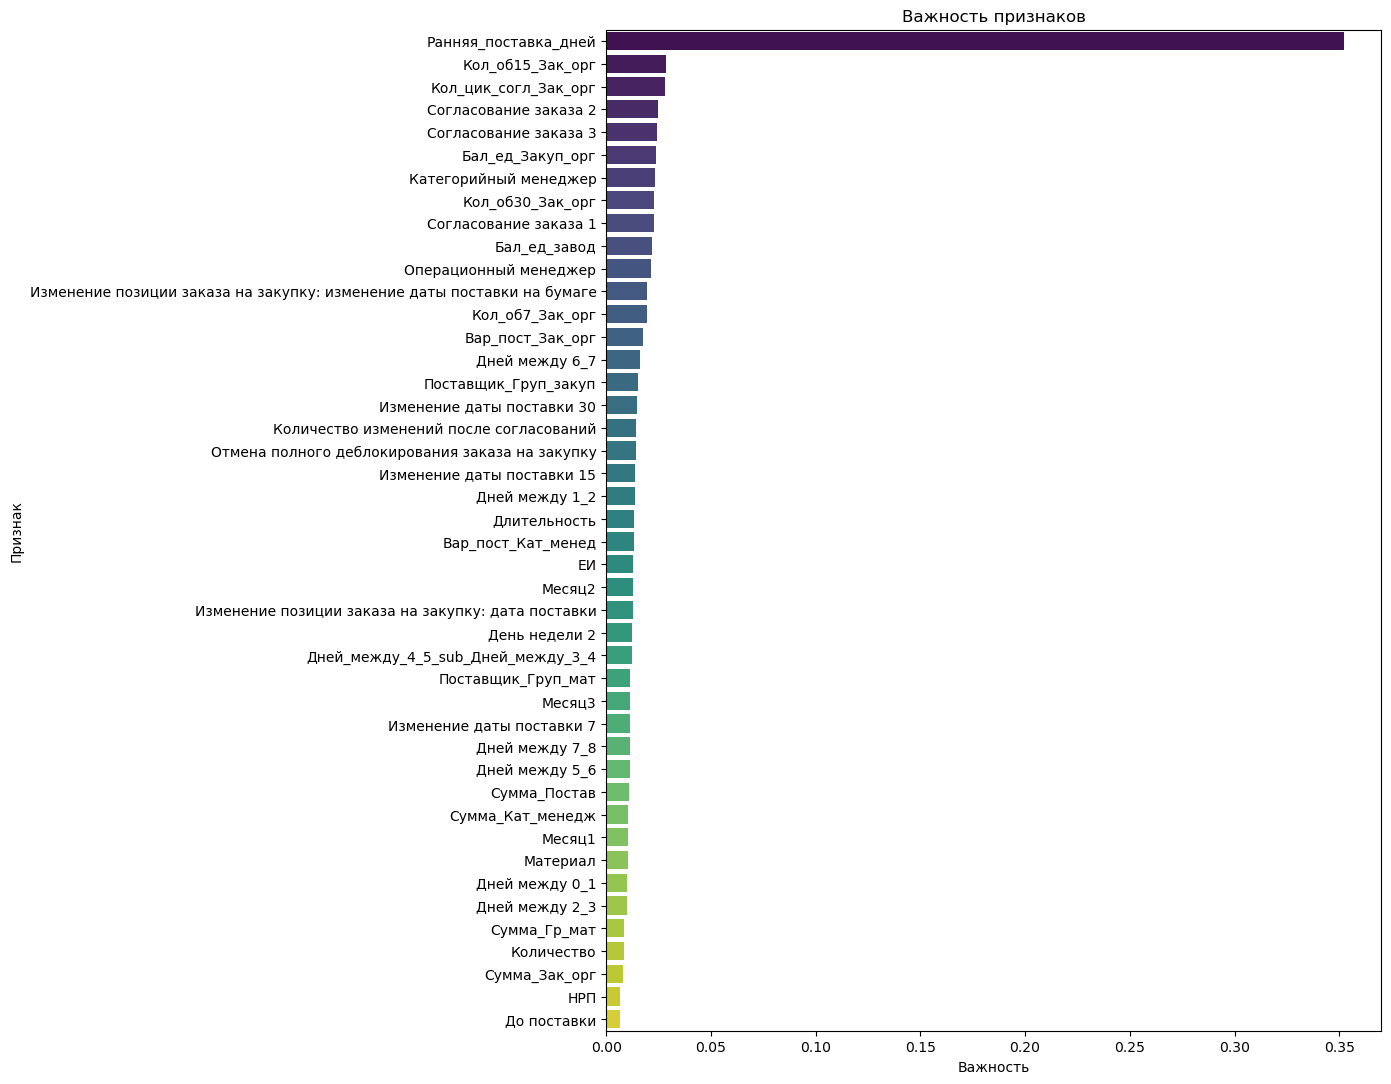

In [40]:
plt.figure(figsize=(10, 13))
sns.barplot(data=t, x='Важность', y='Признак', palette='viridis')
plt.title('Важность признаков')
plt.show()

### Вывод: 
- Выделим топ 3 призака:
    - **Дней до ранней поставки - модель считает наиболее важным**
    - **Количество обработчиков 15(Кол-во пользователей работавших в течении 15 дней на момент появления заказа)**
    - **Доля количества циклов соглассования в закупочной организации**
---

# Итоговый вывод:
- **Познакомились с данными, посмотрели распределения признаков, удалили дубликаты**
- **Получили baseline деревом решений = 0.6789, от которого далее отталккивались**
- **Посмотрели график корреляций Пирсона, постарались сделать новые признаки**
    - Признак ранняя поставка дал значительный прирост с 0.67 до 0.75
    - Далее объединяли признаки через произведение, через долю, увеличили f1 до 0.78
    - Попробовали случайный лес, показал себя с результатом 0.71, возможно из-за большого числа признаков
    
### Поработали над дисбалансом классов:
- **`Методы OverSampling(1 класс) показали следующие результаты:`**

| Method   | Score |
|----------|-------|
| **SMOTE** | **0.7824**  |
| **BSMOTE** | **0.7818**  |
| **ADASYN** | **0.7707**  |
| **RandomOverSampler** | **0.7839**  |

- **Остановили выбор на RandomOverSampler, получилось увеличить результат с 0.76 до 0.78, далее попробовали уменьшить 0 класс**
---
- **`Методы UnderSampling(0 класс) показали следующие результаты:`**

| Method   | Score |
|----------|-------|
| **TomekLinks** | **0.7826**  |
| **ALLKNN** | **0.7781**  |
| **Downsample** | **0.7871**  | 
| **EditedNearestNeighbours** | **0.7738**  | 

- **Решил не уменьшать 0 класс так как прирост в тысячные не стоит потери данных**
---
- **Далее попробовали модели градиентного бустинга XGB, CB XGB показал себя лучше, оставили его, далее подобрали порог при котором объект относится к 1 классу на CB(показал себя лучше, можно было попробовать усреднить лучшие пороги)**
---
- **Посмотрели важность признаков Топ 3 признака:**
    - Ранняя поставка дней
    - Произведение количества обработчиков работавших с позицией в течении 15 дней на Закупочную организацию
    - Доля количества циклов согласования в закупочной организации